In [ ]:
pip install numpy==1.21.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 5.2 MB/s 
     |████████████████████████████████| 77 kB 4.3 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=25ca357448ec8b611f497caab963b604310b83972cfb6ad983e2128d0c9940c7
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.1.5 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 

In [ ]:
from google.colab import files

In [ ]:
import pandas as pd

non_genome = pd.read_csv("20220916 updated TARCC Data for Dr Broussard.csv")
non_genome

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (30,157,383,384,393,480,724,725,762) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,STUDYID,PATID,VISIT,MISC_TARC_PAT_VISIT,CCR,CCR_YES,CCR_CL_IMPRESS_CODE,CCR_MCIAMEM,CCR_MCIAPLUS,CCR_MCIAPLAN,...,P1_PTTYPEDESC,P1_SERUM,P1_SHARE_AGREE,P1_SHARE_DATEX,P1_TIMEDRAWX,P1_TIMEFOODX,P1_TIMESTICKX,P1_WHOLEBLOOD,P1_WHYNOTALL,P1_WHYNOTALLX
0,1119,11001119,1,1100111901,0,,,,,,...,AD,0,0,,,,,1,0,
1,1221,11001221,1,1100122101,0,,,,,,...,AD,1,0,,,,,1,0,
2,1221,11001221,2,1100122102,0,,,,,,...,AD,1,0,,16:50:00,,,1,0,
3,1221,11001221,3,1100122103,0,,,,,,...,AD,0,0,,,,,0,0,
4,1221,11001221,4,1100122104,0,,,,,,...,AD,0,0,,,,,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,200231,81200231,1,8120023101,1,,4,,,,...,MCI,1,1,3/21/2017,9:24:00,19:00:00,,1,0,
14651,200232,81200232,1,8120023201,1,,4,,,,...,MCI,1,1,2/17/2017,13:59:59,12:00:00,,1,0,
14652,200233,81200233,1,8120023301,1,,4,,,,...,MCI,1,1,4/4/2017,9:08:59,7:30:00,,1,0,
14653,200234,81200234,1,8120023401,1,,4,,,,...,MCI,1,1,6/22/2017,9:13:59,7:00:00,,1,0,


In [ ]:
import numpy as np
import regex as re 

#Only retain the data where the patients' samples are analysed with RBM 
df_with_RBM = non_genome[non_genome['RBM_Rule_Based_Medicine']==1]

#Drop columns which are not "biomarkers"
df_biomarkers = df_with_RBM.drop(['STUDYID','VISIT','MISC_TARC_PAT_VISIT','CCR','CCR_YES','CCR_CL_IMPRESS_CODE',
 'CCR_MCIAMEM','CCR_MCIAPLUS','CCR_MCIAPLAN','CCR_MCIAPATT','CCR_MCIAPEX','CCR_MCIAPVIS','CCR_MCINON1','CCR_MCIN1LAN',
 'CCR_MCIN1ATT','CCR_MCIN1EX','CCR_MCIN1VIS','CCR_MCINON2','CCR_MCIN2LAN','CCR_MCIN2ATT','CCR_MCIN2EX','CCR_MCIN2VIS',
 'CCR_YES_NOTES','MISC_SITEID','A1_BIRTHYR','A1_EVENTDATEX','A1_HANDEDNESS','A1_HISPANIC','A1_HISPANIC_TYPE','A1_HISPORX',
 'A1_MARISTAT','A1_RACE','A1_RACESEC','A41_PMA','A41_PMAF','A41_PMAFU','A41_PMAP','A41_PMAPF','A41_PMAPFU','A41_PMAPREV',
 'A41_PMART','A41_PMAS','A41_PMASTDA','A41_PMASTMO','A41_PMASTYR','A41_PMASU','A41_PMB','A41_PMBF','A41_PMBFU','A41_PMBP',
 'A41_PMBPF','A41_PMBPFU','A41_PMBPREV','A41_PMBRT','A41_PMBS','A41_PMBSTDA','A41_PMBSTMO','A41_PMBSTYR','A41_PMBSU',
 'A42_VEA','A42_VEAF','A42_VEAFU','A42_VEAPREV','A42_VEART','A42_VEAS','A42_VEASU','A43_ADA','A43_ADACONT','A43_ADAENDDA',
 'A43_ADAENDMO','A43_ADAENDYR','A43_ADAF','A43_ADAFU','A43_ADAPREV','A43_ADART','A43_ADAS','A43_ADASTDA','A43_ADASTMO','A43_ADASTYR',
 'A43_ADASU','A43_ADB','A43_ADBCONT','A43_ADBENDDA','A43_ADBENDMO','A43_ADBENDYR','A43_ADBF','A43_ADBFU','A43_ADBPREV','A43_ADBRT',
 'A43_ADBS','A43_ADBSTDA','A43_ADBSTMO','A43_ADBSTYR','A43_ADBSU','A43_ADC','A43_ADCCONT','A43_ADCENDDA','A43_ADCENDMO','A43_ADCENDYR',
 'A43_ADCF', 'A43_ADCFU', 'A43_ADCPREV', 'A43_ADCRT', 'A43_ADCS', 'A43_ADCSTDA', 'A43_ADCSTMO',
 'A43_ADCSTYR','A43_ADCSU','A43_ADD','A43_ADDCONT','A43_ADDENDDA','A43_ADDENDMO','A43_ADDENDYR','A43_ADDF','A43_ADDFU','A43_ADDPREV','A43_ADDRT',
 'A43_ADDS','A43_ADDSTDA','A43_ADDSTMO','A43_ADDSTYR','A43_ADDSU','A43_ADE','A43_ADECONT','A43_ADEENDDA','A43_ADEENDMO','A43_ADEENDYR',
 'A43_ADEF','A43_ADEFU','A43_ADEPREV','A43_ADERT','A43_ADES','A43_ADESTDA','A43_ADESTMO','A43_ADESTYR','A43_ADESU','A43_ADF','A43_ADFCONT',
 'A43_ADFENDDA','A43_ADFENDMO','A43_ADFENDYR','A43_ADFF','A43_ADFFU','A43_ADFPREV','A43_ADFRT','A43_ADFS','A43_ADFSTDA','A43_ADFSTMO','A43_ADFSTYR',
 'A43_ADFSU','A43_ADMEDEVER','A44_DRG_TRIAL','A44_DRG_TRIALX','A44_SSA','A44_SSAF','A44_SSAFU','A44_SSAPREV','A44_SSART','A44_SSAS','A44_SSASTDA',
 'A44_SSASTMO','A44_SSASTYR','A44_SSASU','A44_SSB','A44_SSBF','A44_SSBFU','A44_SSBPREV','A44_SSBRT','A44_SSBS','A44_SSBSTDA','A44_SSBSTMO',
 'A44_SSBSTYR','A44_SSBSU','A44_SSC','A44_SSCF','A44_SSCFU','A44_SSCPREV','A44_SSCRT','A44_SSCS','A44_SSCSTDA','A44_SSCSTMO','A44_SSCSTYR',
 'A44_SSCSU','A44_SSD','A44_SSDF','A44_SSDFU','A44_SSDPREV','A44_SSDRT','A44_SSDS','A44_SSDSTDA','A44_SSDSTMO','A44_SSDSTYR','A44_SSDSU',
 'A44_SSE','A44_SSEF','A44_SSEFU','A44_SSEPREV','A44_SSERT','A44_SSES','A44_SSESTDA','A44_SSESTMO','A44_SSESTYR','A44_SSESU','A44_SSF',
 'A44_SSFF','A44_SSFFU','A44_SSFPREV','A44_SSFRT','A44_SSFS','A44_SSFSTDA','A44_SSFSTMO','A44_SSFSTYR','A44_SSFSU','A5_ABUSOTHR','A5_ABUSX',
 'A5_ALCOHOL','A5_ARTHRITIC','A5_AUTOIMM','A5_B12DEF','A5_CANCER','A5_CBOTHR','A5_CBOTHRX','A5_CBSTROKE','A5_CBTIA','A5_CHRON_OTH','A5_CHRON_OTHX',
 'A5_CVAFIB', 'A5_CVANGIO','A5_CVBYPASS','A5_CVCHF','A5_CVHATT','A5_CVOTHR','A5_CVOTHRX','A5_CVPACE','A5_DEP2YRS','A5_DEPOTHR','A5_DIABETES',
 'A5_HYPERCHO','A5_HYPERTEN','A5_IBD','A5_INCONTF','A5_INCONTU','A5_NCOTHR','A5_NCOTHRX','A5_PACKSPER','A5_PD','A5_PDOTHR','A5_PDOTHRYR',
 'A5_PDYR','A5_PSYCDIS','A5_PSYCDISX','A5_QUITSMOK','A5_SEIZURES','A5_SMOKYRS','A5_STROK1YR','A5_STROK2YR','A5_STROK3YR','A5_STROK4YR',
 'A5_STROK5YR','A5_STROK6YR','A5_THYROID','A5_TIA1YR','A5_TIA2YR','A5_TIA3YR','A5_TIA4YR','A5_TIA5YR','A5_TIA6YR','A5_TOBAC100','A5_TOBAC30',
 'A5_TOBACLSTYR','A5_TRAUMBRF','A5_TRAUMCHR','A5_TRAUMEXT','B1_HEARAID','B1_HEARING','B1_HEARWAID','B1_HEIGHT','B1_HRATE','B1_VISCORR','B1_VISION',
 'B1_VISWCORR','B1_WEIGHT','B5_NPIQINF','B5_NPIQINFX','B5_DEL','B5_DELSEV','B5_HALL','B5_HALLSEV','B5_AGIT','B5_AGITSEV','B5_DEPD','B5_DEPDSEV',
 'B5_ANX','B5_ANXSEV','B5_ELAT','B5_ELATSEV','B5_APA','B5_APASEV','B5_DISN','B5_DISNSEV','B5_IRR','B5_IRRSEV','B5_MOT','B5_MOTSEV','B5_NITE',
 'B5_NITESEV','B5_APP','B5_APPSEV','C1_ANIMAL','C1_BOSTON30','C1_BOSTON60','C1_DATEX','C1_CDRCA','C1_CDRGLOB','C1_CDRHOB','C1_CDRJU','C1_CDRMEM',
 'C1_CDROR','C1_CDRPER','C1_CDRSUM', 'C1_CERAD_LL_1', 'C1_CERAD_LL_2', 'C1_CERAD_LL_3', 'C1_CERAD_LL_DELAY', 'C1_CERAD_LL_TOT', 'C1_CERAD_WR_DISCRIM',
 'C1_CERAD_WR_NO', 'C1_CERAD_WR_YES', 'C1_CLOCK', 'C1_CLOX1', 'C1_CLOX2', 'C1_FAS_A', 'C1_FAS_F', 'C1_FAS_S', 'C1_GDS15', 'C1_GDS30', 'C1_LITPROB',
 'C1_MMSE', 'C1_SS_AMNART', 'C1_SS_BOSTON60', 'C1_SS_COMBINED_DIGTOT', 'C1_SS_COMBINED_LM_I', 'C1_SS_COMBINED_LM_II', 'C1_SS_COMBINED_VR_I',
 'C1_SS_COMBINED_VR_II', 'C1_SS_COWAT', 'C1_SS_TRAILA', 'C1_SS_TRAILB', 'C1_SS_WAIS3_DIGTOT', 'C1_SS_WAISR_DIGTOT', 'C1_SS_WMS3_LM_I',
 'C1_SS_WMS3_LM_II', 'C1_SS_WMS3_VR_I', 'C1_SS_WMS3_VR_II', 'C1_SS_WMSR_DIGTOT', 'C1_SS_WMSR_LM_I', 'C1_SS_WMSR_LM_II','C1_SS_WMSR_VR_I',
 'C1_SS_WMSR_VR_II','C1_TAPS','C1_TCS_DK','C1_TCS_LS','C1_TCS_OTH','C1_TCS_PSV','C1_TOOIMPAIRED','C1_TRAILA', 'C1_TRAILAERR', 'C1_TRAILB',
 'C1_TRAILBERR','C1_WAIS3_DIGIB','C1_WAIS3_DIGIF','C1_WAIS3_DIGILB','C1_WAIS3_DIGILF','C1_WAIS3_DIGTOT','C1_WAISR_DIGIB','C1_WAISR_DIGIF',
 'C1_WAISR_DIGILB','C1_WAISR_DIGILF','C1_WAISR_DIGTOT','C1_WMS3_LMEM1','C1_WMS3_LMEM2','C1_WMS3_STORY1A','C1_WMS3_STORY1B1',
 'C1_WMS3_STORY1B2', 'C1_WMS3_STORY2A', 'C1_WMS3_STORY2B','C1_WMS3_VR_A', 'C1_WMS3_VR_B', 'C1_WMS3_VR_C', 'C1_WMS3_VR_D', 'C1_WMS3_VR_E',
 'C1_WMS3_VR2_A', 'C1_WMS3_VR2_B', 'C1_WMS3_VR2_C', 'C1_WMS3_VR2_D', 'C1_WMS3_VR2_E', 'C1_WMS3_VRI', 'C1_WMS3_VRII', 'C1_WMSR_DIGIB',
 'C1_WMSR_DIGIF', 'C1_WMSR_DIGILB', 'C1_WMSR_DIGILF', 'C1_WMSR_DIGTOT', 'C1_WMSR_LMEM1', 'C1_WMSR_LMEM2', 'C1_WMSR_STORY1A', 'C1_WMSR_STORY1B1',
 'C1_WMSR_STORY2A', 'C1_WMSR_STORY2B', 'C1_WMSR_VR_A', 'C1_WMSR_VR_B', 'C1_WMSR_VR_C', 'C1_WMSR_VR_D', 'C1_WMSR_VR2_A', 'C1_WMSR_VR2_B',
 'C1_WMSR_VR2_C', 'C1_WMSR_VR2_D', 'C1_WMSR_VRI', 'C1_WMSR_VRII', 'D1_ALCDEM', 'D1_ALCDEMIF', 'D1_BRNINJ', 'D1_BRNINJIF', 'D1_COGOTH', 'D1_COGOTHIF',
 'D1_COGOTHX', 'D1_CORT', 'D1_CORTIF', 'D1_DEMENTED', 'D1_DEMUN', 'D1_DEMUNIF', 'D1_DEP', 'D1_DEPIF', 'D1_DLB', 'D1_DLBIF', 'D1_DOWNS',
 'D1_DOWNSIF', 'D1_DYSILL', 'D1_DYSILLIF', 'D1_FTD', 'D1_FTDIF', 'D1_HUNT', 'D1_HUNTIF', 'D1_HYCEPH', 'D1_HYCEPHIF', 'D1_IMPNOMCI',
 'D1_MCIAMEM', 'D1_MCIAPATT', 'D1_MCIAPEX', 'D1_MCIAPLAN', 'D1_MCIAPLUS', 'D1_MCIAPVIS', 'D1_MCIN1ATT', 'D1_MCIN1EX', 'D1_MCIN1LAN', 'D1_MCIN1VIS',
 'D1_MCIN2ATT', 'D1_MCIN2EX', 'D1_MCIN2LAN', 'D1_MCIN2VIS', 'D1_MCINON1', 'D1_MCINON2', 'D1_MEDS', 'D1_MEDSIF', 'D1_NEOP', 'D1_NEOPIF',
 'D1_NORMCOG', 'D1_OTHPSY', 'D1_OTHPSYIF', 'D1_PARK', 'D1_PARKIF', 'D1_PNAPH', 'D1_POS_VASC', 'D1_POS_VASCIF', 'D1_POSSAD', 'D1_POSSADIF',
 'D1_PPAOTHR', 'D1_PPAPH', 'D1_PPAPHIF', 'D1_PRION','D1_PRIONIF', 'D1_PROBAD', 'D1_PROBADIF', 'D1_PSP', 'D1_PSPIF', 'D1_SEMDEMAG', 'D1_SEMDEMAN',
 'D1_STROKE', 'D1_STROKEIF', 'D1_VASC', 'D1_VASCIF', 'D1_WHODIDDX', 'E1_RESIDE_DAT', 'P1_BDATEENROLLX', 'P1_DNACOLLECTED', 'P1_DNATYPE',
 'P1_INBIOMARKER', 'P1_INGENETICS', 'X1_ANGINA_SR', 'X1_ARRHY_SR', 'X1_ATRIAL_SR', 'X1_BMIGT30', 'X1_CHF_SR', 'X1_HYPER_HAS', 'X1_HYPERLIP_HAS',
 'X1_HYPERLIP_SR', 'X1_MI_SR', 'X1_OBESE_AB', 'X1_OBESE_IS', 'X1_OBESE_OTHX', 'X1_SMOKE_CUR', 'X1_SMOKE_EVER', 'X2_IDURM', 'X2_IDURY', 'X2_MRDURM',
 'X2_MRDURY', 'X2_PHYEST', 'X2_PHYESTFIRM', 'PID', 'RBM_Rule_Based_Medicine_tp', 'RBM_Batch', 'RBM_TARC_PID', 'Q1_Quanterix', 'Q1_Quanterix_tp',
 'Q1_YKL_40', 'Q1_GFAP', 'Q1_NFL', 'Q1_Total_tau', 'Q1_UCHL1', 'Q1_CD14', 'E1_DIED', 'E1_EXITDATEX', 'E1_LOST', 'E1_RESIDE_CARE', 'E1_WDOTHREAS',
 'E1_WDOTHREASX', 'E1_WITHDREW', 'F1_PSMS1', 'F1_PSMS2', 'F1_PSMS3', 'F1_PSMS4', 'F1_PSMS5', 'F1_PSMS6', 'F1_PSMSTOTSCR', 'F2_IADL1',
 'F2_IADL2', 'F2_IADL3', 'F2_IADL4', 'F2_IADL5', 'F2_IADL6', 'F2_IADL7', 'F2_IADL8', 'F2_IADLTOTSCR', 'I1_INBIRYR', 'I1_INCALLS', 'I1_INDATECONTX',
 'I1_INEDUC', 'I1_INHISP', 'I1_INHISPOR', 'I1_INHISPOX', 'I1_INHOWCONTACT', 'I1_INLIVWTH', 'I1_INRACE', 'I1_INRACEX', 'I1_INRASEC', 'I1_INRASECX',
 'I1_INRATER', 'I1_INRATERX', 'I1_INRELTO', 'I1_INRELTOX', 'I1_INRELY', 'I1_INSEX', 'I1_INVISITS', 'I1_ISNEWINFORM', 'P1_BIOSERUM', 'P1_BUFFY',
 'P1_CSF', 'P1_DATEDRAWX', 'P1_DATEFOODX','P1_DATESTICKX', 'P1_GDATEENROLLX', 'P1_HRSAFTFOOT', 'P1_PLASMA', 'P1_PT_TYPE_OTHX', 'P1_PTTYPEDESC',
 'P1_SERUM', 'P1_SHARE_AGREE', 'P1_SHARE_DATEX', 'P1_TIMEDRAWX','P1_TIMEFOODX', 'P1_TIMESTICKX', 'P1_WHOLEBLOOD', 'P1_WHYNOTALL', 'P1_WHYNOTALLX',
 'RBM_Rule_Based_Medicine', 'A1_RESIDENC', 'GWAS'], axis=1)
  
#removing proteo biomarkers that have missing values as majority
df_biomarkers = df_biomarkers.drop(['PROTEO_EOTAXIN_3_HUMAN', 'PROTEO_IL_12_P70_HUMAN', 
  'PROTEO_IL_13_HUMAN', 'PROTEO_IL_17A','PROTEO_IL_1A','PROTEO_IL_4_HUMAN',
         'PROTEO_IL_8_HA'], axis=1)
  
#removing blood biomarkers that have missing values as majority
df_biomarkers = df_biomarkers.drop(['APOE_GENOTYPE','P1_BGRESULT', 'RBM_VDBP', 'RBM_OSM', 'RBM_Active_GLP_1', 'RBM_Galanin',
  'RBM_BMP6', 'RBM_ASP', 'APOE_GENOTYPE_DIGITS','APOE_E2_COUNT','APOE_E3_COUNT','APOE_E4_COUNT'], axis=1)
  
#replacing empty strings(missing vals) with NaN values
df_biomarkers = df_biomarkers.replace(r'^\s*$', np.nan, regex=True)

#fill NaN vals as -9
nullvals=list(df_biomarkers.isna().sum()[df_biomarkers.isna().sum()>0].index)
df_biomarkers[nullvals]=df_biomarkers[nullvals].fillna(-9)

#Removing rows with missing vals in proteo features
missing_rows = list(df_biomarkers[df_biomarkers == -777777].count()[df_biomarkers[df_biomarkers == -777777].count() > 0].index)
indices = []
for row in missing_rows:
  for ind in list(df_biomarkers[df_biomarkers[row] == -777777].index):
    indices.append(ind)

indices = [*set(indices)]
indices
df_biomarkers = df_biomarkers.drop(indices, axis=0)


#Tranforming extreme values in proteo features
# -888888(GHDL) mapped to highest possible value and LLDL mapped to least value
df_biomarkers = df_biomarkers.replace(-888888, 999999999)
df_biomarkers = df_biomarkers.replace(-999999, -1)

#convert categorical object columns to floats
categoricalcols=list(df_biomarkers.dtypes[df_biomarkers.dtypes==object].index)
df_biomarkers[categoricalcols]=df_biomarkers[categoricalcols].astype(float)
  
#removing rows which contain missing vals in all RBM features
all_cols = df_biomarkers.columns
regex_rbm = re.compile("^RBM_.*$")
rbm_cols = list(filter(regex_rbm.match, all_cols))
df_biomarkers = df_biomarkers[df_biomarkers[rbm_cols].apply(pd.Series.nunique, axis=1) > 1]

#removing patient record which has 2 visits
df_biomarkers = df_biomarkers.drop(3217, axis=0)

df_biomarkers = df_biomarkers[df_biomarkers['P1_PT_TYPE'].isin([1,2])]
df_biomarkers

,PATID,AGE,A1_SEX,A3_DADDEM,A3_MOMDEM,B1_BMI,B1_BPDIAS,B1_BPSYS,P1_PT_TYPE,PROTEO_ADIPONECTIN,...,RBM_TBG,RBM_TIMP_1,RBM_TF,RBM_TNF_RII,RBM_TNF_alpha,RBM_TNF_beta,RBM_TRAIL_R3,RBM_VCAM_1,RBM_VEGF,RBM_VWF
1,11001221,84,1,0,0,24.0,40,130,1,34614.83,...,59.0,126.0,0.530,5.0,1.9,1.35,7.4,592.0,531.0,40.0
8,11001300,68,0,0,0,31.3,88,140,1,46271.92,...,83.0,160.0,0.090,4.1,1.5,1.35,18.0,473.0,712.0,39.0
16,11001372,76,0,0,0,21.6,60,154,1,15656.48,...,47.0,157.0,0.180,4.4,1.8,1.35,11.0,575.0,520.0,44.0
27,11001405,86,0,0,0,26.1,64,131,1,26037.56,...,61.0,260.0,0.310,6.0,6.1,1.15,7.8,885.0,707.0,73.0
31,11001429,82,0,1,0,25.8,70,140,1,68661.17,...,54.0,261.0,0.140,9.2,3.4,1.15,7.1,774.0,1840.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,61000217,68,1,0,0,29.6,70,118,2,26231.20,...,88.0,382.0,0.140,9.7,9.4,3.00,5.0,1020.0,713.0,48.0
10277,61000218,57,0,1,0,33.5,86,132,2,32107.50,...,64.0,160.0,0.140,5.2,5.0,1.15,6.1,609.0,616.0,48.0
10285,61000219,68,0,0,1,23.6,72,110,2,55154.79,...,20.0,172.0,0.140,5.0,1.7,5.00,6.5,593.0,692.0,3.4
12002,61202145,65,0,1,1,25.4,68,122,2,10321.81,...,59.0,195.0,0.195,7.0,6.1,5.30,5.3,497.0,404.0,18.0


In [ ]:
df=non_genome.drop(['STUDYID','VISIT','MISC_TARC_PAT_VISIT','CCR','CCR_YES','CCR_CL_IMPRESS_CODE','CCR_MCIAMEM','CCR_MCIAPLUS','CCR_MCIAPLAN','CCR_MCIAPATT','CCR_MCIAPEX',
               'CCR_MCIAPVIS','CCR_MCINON1','CCR_MCIN1LAN','CCR_MCIN1ATT','CCR_MCIN1EX','CCR_MCIN1VIS','CCR_MCINON2','CCR_MCIN2LAN','CCR_MCIN2ATT','CCR_MCIN2EX','CCR_MCIN2VIS',
               'CCR_YES_NOTES','MISC_SITEID','A1_BIRTHYR','A1_EVENTDATEX','A1_HANDEDNESS','A1_HISPANIC','A1_HISPANIC_TYPE','A1_HISPORX','A1_MARISTAT','A1_RACE','A1_RACESEC',
               'A1_RESIDENC','A41_PMA','A41_PMAF','A41_PMAFU','A41_PMAP','A41_PMAPF','A41_PMAPFU','A41_PMAPREV','A41_PMART','A41_PMAS','A41_PMASTDA','A41_PMASTMO','A41_PMASTYR',
               'A41_PMASU','A41_PMB','A41_PMBF','A41_PMBFU','A41_PMBP','A41_PMBPF','A41_PMBPFU','A41_PMBPREV','A41_PMBRT','A41_PMBS','A41_PMBSTDA','A41_PMBSTMO','A41_PMBSTYR',
               'A41_PMBSU','A42_VEA','A42_VEAF','A42_VEAFU','A42_VEAPREV','A42_VEART','A42_VEAS','A42_VEASU','A43_ADA','A43_ADACONT','A43_ADAENDDA','A43_ADAENDMO','A43_ADAENDYR',
               'A43_ADAF','A43_ADAFU','A43_ADAPREV','A43_ADART','A43_ADAS','A43_ADASTDA','A43_ADASTMO','A43_ADASTYR','A43_ADASU','A43_ADB','A43_ADBCONT','A43_ADBENDDA','A43_ADBENDMO',
               'A43_ADBENDYR','A43_ADBF','A43_ADBFU','A43_ADBPREV','A43_ADBRT','A43_ADBS','A43_ADBSTDA','A43_ADBSTMO','A43_ADBSTYR','A43_ADBSU','A43_ADC','A43_ADCCONT','A43_ADCENDDA',
               'A43_ADCENDMO','A43_ADCENDYR','A43_ADCF','A43_ADCFU','A43_ADCPREV','A43_ADCRT','A43_ADCS','A43_ADCSTDA','A43_ADCSTMO','A43_ADCSTYR','A43_ADCSU','A43_ADD','A43_ADDCONT',
               'A43_ADDENDDA','A43_ADDENDMO','A43_ADDENDYR','A43_ADDF','A43_ADDFU','A43_ADDPREV','A43_ADDRT','A43_ADDS','A43_ADDSTDA','A43_ADDSTMO','A43_ADDSTYR','A43_ADDSU','A43_ADE','A43_ADECONT',
               'A43_ADEENDDA','A43_ADEENDMO','A43_ADEENDYR','A43_ADEF','A43_ADEFU','A43_ADEPREV','A43_ADERT','A43_ADES','A43_ADESTDA','A43_ADESTMO','A43_ADESTYR','A43_ADESU','A43_ADF',
               'A43_ADFCONT','A43_ADFENDDA','A43_ADFENDMO','A43_ADFENDYR','A43_ADFF','A43_ADFFU','A43_ADFPREV','A43_ADFRT','A43_ADFS','A43_ADFSTDA','A43_ADFSTMO','A43_ADFSTYR','A43_ADFSU',
               'A43_ADMEDEVER','A44_DRG_TRIAL','A44_DRG_TRIALX','A44_SSA','A44_SSAF','A44_SSAFU','A44_SSAPREV','A44_SSART','A44_SSAS','A44_SSASTDA','A44_SSASTMO','A44_SSASTYR','A44_SSASU',
               'A44_SSB','A44_SSBF','A44_SSBFU','A44_SSBPREV','A44_SSBRT','A44_SSBS','A44_SSBSTDA','A44_SSBSTMO','A44_SSBSTYR','A44_SSBSU','A44_SSC','A44_SSCF','A44_SSCFU',
               'A44_SSCPREV','A44_SSCRT','A44_SSCS','A44_SSCSTDA','A44_SSCSTMO','A44_SSCSTYR','A44_SSCSU','A44_SSD','A44_SSDF','A44_SSDFU','A44_SSDPREV','A44_SSDRT',
               'A44_SSDS','A44_SSDSTDA','A44_SSDSTMO','A44_SSDSTYR','A44_SSDSU','A44_SSE','A44_SSEF','A44_SSEFU','A44_SSEPREV','A44_SSERT','A44_SSES','A44_SSESTDA','A44_SSESTMO',
               'A44_SSESTYR','A44_SSESU','A44_SSF','A44_SSFF','A44_SSFFU','A44_SSFPREV','A44_SSFRT','A44_SSFS','A44_SSFSTDA','A44_SSFSTMO','A44_SSFSTYR','A44_SSFSU',
               'A5_ABUSOTHR','A5_ABUSX','A5_CBOTHR','A5_CBOTHRX','A5_CHRON_OTH','A5_CHRON_OTHX','A5_CVOTHR','A5_CVOTHRX','A5_DEP2YRS','A5_DEPOTHR','A5_NCOTHR','A5_NCOTHRX',
               'A5_PACKSPER','A5_PDOTHR','A5_PDOTHRYR','A5_PDYR','A5_PSYCDISX','A5_QUITSMOK','A5_SMOKYRS','A5_STROK1YR','A5_STROK2YR','A5_STROK3YR','A5_STROK4YR','A5_STROK5YR',
               'A5_STROK6YR','A5_TIA1YR','A5_TIA2YR','A5_TIA3YR','A5_TIA4YR','A5_TIA5YR','A5_TIA6YR','A5_TOBAC100','A5_TOBAC30','A5_TOBACLSTYR','A5_TRAUMEXT','APOE_GENOTYPE',
               'APOE_GENOTYPE_DIGITS','APOE_E2_COUNT','APOE_E3_COUNT','APOE_E4_COUNT','B1_HEARAID','B1_HEARING','B1_HEARWAID','B1_HEIGHT','B1_HRATE','B1_VISCORR','B1_VISION',
               'B1_VISWCORR','B1_WEIGHT','B5_NPIQINF','B5_NPIQINFX','B5_DELSEV','B5_HALLSEV','B5_AGITSEV','B5_DEPDSEV','B5_ANXSEV','B5_ELATSEV','B5_APASEV','B5_DISNSEV',
               'B5_IRRSEV','B5_MOTSEV','B5_NITESEV','B5_APPSEV','C1_ANIMAL','C1_BOSTON30','C1_BOSTON60','C1_DATEX','C1_CDRCA','C1_CDRGLOB','C1_CDRHOB','C1_CDRJU','C1_CDRMEM',
               'C1_CDROR','C1_CDRPER','C1_CDRSUM','C1_CERAD_LL_1','C1_CERAD_LL_2','C1_CERAD_LL_3','C1_CERAD_LL_DELAY','C1_CERAD_LL_TOT','C1_CERAD_WR_DISCRIM','C1_CERAD_WR_NO',
               'C1_CERAD_WR_YES','C1_CLOCK','C1_CLOX1','C1_CLOX2','C1_FAS_A','C1_FAS_F','C1_FAS_S','C1_GDS15','C1_GDS30','C1_LITPROB','C1_MMSE','C1_SS_AMNART','C1_SS_BOSTON60',
               'C1_SS_COMBINED_DIGTOT','C1_SS_COMBINED_LM_I','C1_SS_COMBINED_LM_II','C1_SS_COMBINED_VR_I','C1_SS_COMBINED_VR_II','C1_SS_COWAT','C1_SS_TRAILA','C1_SS_TRAILB',
               'C1_SS_WAIS3_DIGTOT','C1_SS_WAISR_DIGTOT','C1_SS_WMS3_LM_I','C1_SS_WMS3_LM_II','C1_SS_WMS3_VR_I','C1_SS_WMS3_VR_II','C1_SS_WMSR_DIGTOT','C1_SS_WMSR_LM_I','C1_SS_WMSR_LM_II',
               'C1_SS_WMSR_VR_I','C1_SS_WMSR_VR_II','C1_TAPS','C1_TCS_DK','C1_TCS_LS','C1_TCS_OTH','C1_TCS_PSV','C1_TOOIMPAIRED','C1_TRAILA','C1_TRAILAERR','C1_TRAILB',
               'C1_TRAILBERR','C1_WAIS3_DIGIB','C1_WAIS3_DIGIF','C1_WAIS3_DIGILB','C1_WAIS3_DIGILF','C1_WAIS3_DIGTOT','C1_WAISR_DIGIB','C1_WAISR_DIGIF','C1_WAISR_DIGILB',
               'C1_WAISR_DIGILF','C1_WAISR_DIGTOT','C1_WMS3_LMEM1','C1_WMS3_LMEM2','C1_WMS3_STORY1A','C1_WMS3_STORY1B1','C1_WMS3_STORY1B2','C1_WMS3_STORY2A','C1_WMS3_STORY2B','C1_WMS3_VR_A',
               'C1_WMS3_VR_B','C1_WMS3_VR_C','C1_WMS3_VR_D','C1_WMS3_VR_E','C1_WMS3_VR2_A','C1_WMS3_VR2_B','C1_WMS3_VR2_C','C1_WMS3_VR2_D','C1_WMS3_VR2_E','C1_WMS3_VRI','C1_WMS3_VRII',
               'C1_WMSR_DIGIB','C1_WMSR_DIGIF','C1_WMSR_DIGILB','C1_WMSR_DIGILF','C1_WMSR_DIGTOT','C1_WMSR_LMEM1','C1_WMSR_LMEM2','C1_WMSR_STORY1A','C1_WMSR_STORY1B1','C1_WMSR_STORY2A',
               'C1_WMSR_STORY2B','C1_WMSR_VR_A','C1_WMSR_VR_B','C1_WMSR_VR_C','C1_WMSR_VR_D','C1_WMSR_VR2_A','C1_WMSR_VR2_B','C1_WMSR_VR2_C','C1_WMSR_VR2_D','C1_WMSR_VRI','C1_WMSR_VRII',
               'D1_ALCDEM','D1_ALCDEMIF','D1_BRNINJIF','D1_COGOTH','D1_COGOTHIF','D1_COGOTHX','D1_CORTIF','D1_DEMENTED','D1_DEMUN','D1_DEMUNIF','D1_DEPIF','D1_DLB','D1_DLBIF','D1_DOWNS',
               'D1_DOWNSIF','D1_DYSILLIF','D1_FTD','D1_FTDIF','D1_HUNT','D1_HUNTIF','D1_HYCEPHIF','D1_IMPNOMCI','D1_MCIAMEM','D1_MCIAPATT','D1_MCIAPEX','D1_MCIAPLAN','D1_MCIAPLUS',
               'D1_MCIAPVIS','D1_MCIN1ATT','D1_MCIN1EX','D1_MCIN1LAN','D1_MCIN1VIS','D1_MCIN2ATT','D1_MCIN2EX','D1_MCIN2LAN','D1_MCIN2VIS','D1_MCINON1','D1_MCINON2','D1_MEDS','D1_MEDSIF',
               'D1_NEOPIF','D1_NORMCOG','D1_OTHPSY','D1_OTHPSYIF','D1_PARKIF','D1_POS_VASC','D1_POS_VASCIF','D1_POSSAD','D1_POSSADIF','D1_PPAOTHR','D1_PPAPHIF','D1_PRION',
               'D1_PRIONIF','D1_PROBAD','D1_PROBADIF','D1_PSP','D1_PSPIF','D1_SEMDEMAG','D1_SEMDEMAN','D1_STROKEIF','D1_VASCIF','D1_WHODIDDX','E1_RESIDE_DAT','P1_BDATEENROLLX',
               'P1_DNACOLLECTED','P1_DNATYPE','P1_INBIOMARKER','P1_INGENETICS','PROTEO_ADIPONECTIN','PROTEO_BFGF','PROTEO_CLUSTERIN','PROTEO_CRP','PROTEO_EOTAXIN_HUMAN',
               'PROTEO_EOTAXIN_3_HUMAN','PROTEO_FABP3','PROTEO_FACTOR_VII','PROTEO_FLT_1','PROTEO_GLUCAGON','PROTEO_GM_CSF_HUMAN','PROTEO_IFN_Y_HUMAN','PROTEO_IL_10_HUMAN','PROTEO_IL_12_P40_HUMAN',
               'PROTEO_IL_12_P70_HUMAN','PROTEO_IL_13_HUMAN','PROTEO_IL_15','PROTEO_IL_16','PROTEO_IL_17A','PROTEO_IL_1A','PROTEO_IL_1B_HUMAN','PROTEO_IL_2_HUMAN','PROTEO_IL_4_HUMAN','PROTEO_IL_5_HUMAN',
               'PROTEO_IL_6_HUMAN','PROTEO_IL_7_HUMAN','PROTEO_IL_8_HUMAN','PROTEO_IL_8_HA','PROTEO_INSULIN','PROTEO_IP_10_HUMAN','PROTEO_LBP','PROTEO_LEPTIN','PROTEO_MCP_1_HUMAN','PROTEO_MCP_4_HUMAN',
               'PROTEO_MDC_HUMAN','PROTEO_MIP_1A_HUMAN','PROTEO_MIP_1B_HUMAN','PROTEO_MPO','PROTEO_NT_PROBNP','PROTEO_PIGF','PROTEO_PYY','PROTEO_RESISTIN','PROTEO_SAA','PROTEO_SICAM_1',
               'PROTEO_SVCAM_1','PROTEO_TARC_HUMAN','PROTEO_TIE_2','PROTEO_TNF_A_HUMAN','PROTEO_TNF_B','PROTEO_TOTAL_GIP','PROTEO_VEGF_ANGIO_PLATE','PROTEO_VEGF_CYTO_PLATE','PROTEO_VEGF_C',
               'PROTEO_VEGF_D','X1_ANGINA_SR','X1_ARRHY_SR','X1_ATRIAL_SR','X1_BMIGT30','X1_CHF_SR','X1_HYPER_HAS','X1_HYPERLIP_HAS','X1_HYPERLIP_SR','X1_MI_SR','X1_OBESE_OTHX','X1_SMOKE_CUR',
               'X1_SMOKE_EVER','X2_IDURM','X2_IDURY','X2_MRDURM','X2_MRDURY','X2_PHYEST','X2_PHYESTFIRM','PID','GWAS','RBM_Rule_Based_Medicine','RBM_Rule_Based_Medicine_tp','RBM_Batch','RBM_TARC_PID',
               'RBM_ACE_CD143','RBM_Adiponectin','RBM_AgRP','RBM_Alpha_1','RBM_Alpha_2','RBM_Alpga_F','RBM_Amphiregulin','RBM_ANG_2','RBM_Angiotensinogen','RBM_APO_A1','RBM_APO_CIII',
               'RBM_APO_H','RBM_ASP','RBM_AXL','RBM_BLC','RBM_B2M','RBM_BTC','RBM_BMP6','RBM_BDNF','RBM_CRP','RBM_CA_125','RBM_CA_19_9','RBM_CEA','RBM_CD40','RBM_CD40L','RBM_CgA',
               'RBM_Complement_3','RBM_Cortisol','RBM_CK_MB','RBM_CTGF','RBM_EGF','RBM_EGF_R','RBM_ENA_78','RBM_EN_RAGE','RBM_Eotaxin','RBM_Eotaxin_3','RBM_Epiregulin','RBM_Factor_VII',
               'RBM_FAS','RBM_FASL','RBM_FABP','RBM_Ferritin','RBM_Fibrinogen','RBM_FSH','RBM_Galanin','RBM_G_CSF','RBM_Active_GLP_1','RBM_GSTs','RBM_GRO_alpha','RBM_GH','RBM_Haptoglobin',
               'RBM_HB_EGF','RBM_HCC_4','RBM_HGF','RBM_I_309','RBM_ICAM_1','RBM_IFNg','RBM_IgA','RBM_IgE','RBM_IGF_1','RBM_IGF_BP_2','RBM_IgM','RBM_IL_10','RBM_IL_12p40',
               'RBM_IL_13','RBM_IL_15','RBM_IL_16','RBM_IL_18','RBM_IL_1ra','RBM_IL_3','RBM_IL_5','RBM_IL_7','RBM_IL_8','RBM_Insulin','RBM_Leptin','RBM_LH','RBM_Lpa','RBM_MCP_1',
               'RBM_MDC','RBM_MIF','RBM_MIP_1a','RBM_MIP_1b','RBM_MMP_3','RBM_MPO','RBM_Myoglobin','RBM_OSM','RBM_PAI_1','RBM_PP','RBM_PDGF','RBM_Progesterone','RBM_Prolactin',
               'RBM_PAP','RBM_PARC','RBM_RANTES','RBM_Resistin','RBM_S100b','RBM_SAP','RBM_SGOT','RBM_SHBG','RBM_SOD','RBM_Sortilin','RBM_sRAGE','RBM_SCF','RBM_Tenascin_C','RBM_Testosterone',
               'RBM_TGF_alpha','RBM_THPO','RBM_THPO_1','RBM_TECK','RBM_TSH','RBM_TBG','RBM_TIMP_1','RBM_TF','RBM_TNF_RII','RBM_TNF_alpha','RBM_TNF_beta','RBM_TRAIL_R3','RBM_VCAM_1',
               'RBM_VDBP','RBM_VEGF','RBM_VWF','Q1_Quanterix','Q1_Quanterix_tp','Q1_YKL_40','Q1_GFAP','Q1_NFL','Q1_Total_tau','Q1_UCHL1','Q1_CD14','E1_DIED','E1_EXITDATEX','E1_LOST',
               'E1_RESIDE_CARE','E1_WDOTHREAS','E1_WDOTHREASX','E1_WITHDREW','F1_PSMS1','F1_PSMS2','F1_PSMS3','F1_PSMS4','F1_PSMS5','F1_PSMS6','F1_PSMSTOTSCR','F2_IADL1','F2_IADL2',
               'F2_IADL3','F2_IADL4','F2_IADL5','F2_IADL6','F2_IADL7','F2_IADL8','F2_IADLTOTSCR','I1_INBIRYR','I1_INCALLS','I1_INDATECONTX','I1_INEDUC','I1_INHISP','I1_INHISPOR',
               'I1_INHISPOX','I1_INHOWCONTACT','I1_INLIVWTH','I1_INRACE','I1_INRACEX','I1_INRASEC','I1_INRASECX','I1_INRATER','I1_INRATERX','I1_INRELTO','I1_INRELTOX',
               'I1_INRELY','I1_INSEX','I1_INVISITS','I1_ISNEWINFORM','P1_BGRESULT','P1_BIOSERUM','P1_BUFFY','P1_CSF','P1_DATEDRAWX','P1_DATEFOODX','P1_DATESTICKX','P1_GDATEENROLLX',
               'P1_HRSAFTFOOT','P1_PLASMA','P1_PT_TYPE_OTHX','P1_PTTYPEDESC','P1_SERUM','P1_SHARE_AGREE','P1_SHARE_DATEX','P1_TIMEDRAWX','P1_TIMEFOODX','P1_TIMESTICKX','P1_WHOLEBLOOD',
               'P1_WHYNOTALL','P1_WHYNOTALLX', 'D1_PNAPH','A5_SEIZURES'], axis=1)
#Replace empty strings with null values
df = df.replace(r'^\s*$', np.nan, regex=True)
nullvals=list(df.isna().sum()[df.isna().sum()>0].index)
df[nullvals]=df[nullvals].fillna(9)
#convert categorical object columns to floats
categoricalcols=list(df.dtypes[df.dtypes==object].index)
df[categoricalcols]=df[categoricalcols].astype(float)
df

,PATID,AGE,A1_SEX,A3_DADDEM,A3_MOMDEM,A5_ALCOHOL,A5_ARTHRITIC,A5_AUTOIMM,A5_B12DEF,A5_CANCER,...,D1_DYSILL,D1_HYCEPH,D1_NEOP,D1_PARK,D1_PPAPH,D1_STROKE,D1_VASC,P1_PT_TYPE,X1_OBESE_AB,X1_OBESE_IS
0,11001119,80,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,11001221,84,1,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,11001221,85,1,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,11001221,86,1,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,11001221,87,1,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14650,81200231,73,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
14651,81200232,72,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0
14652,81200233,81,1,0,0,2,0,0,0,0,...,1,0,0,0,0,0,0,4,0,0
14653,81200234,63,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,0,0


In [ ]:
pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.6 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif as MIC
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression #linear_model.LogisticRegression (setting multi_class=”multinomial”)
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
# from sklearn import externals
# import joblib
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from pyparsing import printables

def find_features(model, features, score):
    """
    This function lists and plots the top features
    """
    dict = {'Features':features,'Score':score}
    df=pd.DataFrame(dict)
    df=df.sort_values(by='Score', ascending=False)
    df=df[:20]
    df.plot.bar(x='Features',y='Score')
    plt.title(f'Feature Importance for {model}')
    #plt.savefig(f'results/{model}_features.pdf', format="pdf", bbox_inches="tight")
    plot = plt.show()
    return df, plot


def random_forest_select(name, X,y):
    """
    This function lists and plots random forest feature selection
    """
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    
    #Standard Scaling
    sc=StandardScaler()
    sc.fit(X_train)
    X_train_std=sc.transform(X_train)
    X_test_std=sc.transform(X_test)
    
    Xcols=list(X.columns)
    X_train_std=pd.DataFrame(X_train_std, columns=Xcols)
    X_test_std=pd.DataFrame(X_test_std, columns=Xcols)
    
    #Fitting the model
    forest = RandomForestClassifier(n_estimators=100)
    forest.fit(X_train_std, y_train.values.ravel())
    
    #RF Score
    rf_score=forest.feature_importances_.tolist()

    #RF Features
    rf_features=list(X.columns)

    rf_dict = {'Features':rf_features,'Score':rf_score}
    rf_df=pd.DataFrame(rf_dict)
    rf_df=rf_df.sort_values(by='Score', ascending=False)
    rf_df=rf_df.head(30)
    rf_df.plot.bar(x='Features',y='Score')
    plt.title(f'Feature Importance for Random Forest')
    #plt.savefig(f"results/RandomForest_features_{name}.pdf", format="pdf", bbox_inches="tight")
    rf_plot = plt.show()
    return rf_df, rf_plot


def recursive_selection(rfe, X, y):
    """
    This function lists recursive feature selection
    """
    rfs=rfe.fit(X, y)
    #RFS Features
    rfs_features= list(X.columns)
    #RFS Scores
    rfs_score= rfs.support_.tolist()
    rfs_dict = {'Features':rfs_features,'Score':rfs_score}
    rfs_df= pd.DataFrame.from_dict(rfs_dict)
    rfs_df=rfs_df.loc[rfs_df['Score'] == True]
    return rfs_df


#def fb_selection(name, model, direction_name, direction):
#    """
#    This function lists and plots forward or backward feature selection 
#    """
#    ff1 = sfs(model, k_features=30, forward=direction, verbose=2, scoring='accuracy')
#    ff1 = ff1.fit(X,y)
#    ff1_dict=ff1.get_metric_dict(confidence_interval=0.8)
#    ff1_df = pd.DataFrame.from_dict(ff1_dict).T
#    fig1=plot_sfs(ff1_dict, kind='ci')
#    plt.title(f'{direction_name} Feature Selection using {model} (With confidence interval)')
#    plt.savefig(f'results/{model}_features_{name}.pdf', format="pdf", bbox_inches="tight")
#    plt.grid()
#    plot = plt.show()
#    ff1_features=list(ff1_df['feature_names'][30])
#    return ff1_features, fig1, plot


# def kruskal_select(name,X, y):
#     kruskal_features = []
#     kruskal_scores = []
#     for col in X.columns:
#         feature = X[col]

#         result = stats.kruskal(list(feature), list(y))
        
#         # reject null hypothesis if p <= p_value, else fail to reject null hypothesis and accept the column
#         if result.pvalue > 0:
#             kruskal_features.append(col)
#             kruskal_scores.append(result.pvalue)
    
#     # print(kruskal_features, kruskal_scores)
#     kruskal_features= pd.DataFrame(kruskal_features)
#     kruskal_scores= pd.DataFrame(kruskal_scores)
#     kruskal_df= pd.concat([kruskal_features, kruskal_scores], axis=1)
#     kruskal_df.columns = ['Features', 'Score']
#     kruskal_df = kruskal_df.sort_values(by='Score', ascending=False)
#     kruskal_df.iloc[:30, :]
#     kruskal_df.iloc[:30,:].plot.bar(x='Features',y='Score')
#     plt.title('Feature Selection using Kruskall_Wallace')
#     plt.savefig(f"results/Kruskall_features_{name}.pdf", format="pdf", bbox_inches="tight")
#     kw_plot = plt.show()
#     return kruskal_df, kw_plot

##### Boruta #####
def boruta_select(X,y):
    model = RandomForestRegressor(n_estimators=100, max_depth=5)
    # let's initialize Boruta
    feat_selector = BorutaPy(
        verbose=2,
        estimator=model,
        n_estimators='auto',
        max_iter=10  # number of iterations to perform
    )

    # train Boruta
    # N.B.: X and y must be numpy arrays
    feat_selector.fit(np.array(X), np.array(y))

    # print support and ranking for each feature
    print("\n------Support and Ranking for each feature------")

    for i in range(len(feat_selector.support_)):
        if feat_selector.support_[i]:
            print(X.columns[i],
                " - Ranking: ", feat_selector.ranking_[i])

    boruta_features=[]
    for i in range(len(feat_selector.support_)):
        if feat_selector.support_[i]:
            boruta_features.append(X.columns[i])
    return boruta_features


def results(name, X,y, df_features):
    """
    This function returns the top features of each selection method and the overall top features
    """
    ###### Mutual Info ######
    mi= MIC(X,y)
    #Mutual Info Features
    mi_cols=list(X.columns)
    #Mutual Info Scores
    mi_score=mi.tolist()
    mi_df, mi_plot = find_features(f'mutual_info_{name}', mi_cols, mi_score)

    ###### Chi-Square ######

    df2=df_features
    df2[df2<0]=99 #Chi square doesn't recognize negative values- missing values aka -9 are resubstituted as 99
    X1 = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
    y1 = df2['P1_PT_TYPE']
    chi = chi2(X1,y1)
    #Chi Test Score
    chi_score=chi[1].tolist()
    # #Chi Test Features
    chi_features=list(X1)
    chi_df, chi_plot = find_features(f'chi-square_{name}', chi_features, chi_score)

    ###### Random Forest ######

    rf_df, rf_plot = random_forest_select(name, X,y)

    ###### Recursive Selections ######
    rfr = RFE(estimator=RandomForestClassifier(), n_features_to_select=30)
    rfr_df = recursive_selection(rfr, X, y)

    dtr = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=30)
    dtr_df = recursive_selection(dtr, X, y)

    ###### Forward and Backward selection ######
    # these take so long to run
    #dtf_df, dtf_fig, dtf_plot = fb_selection(model = DecisionTreeClassifier(), direction_name = 'Forward', direction = True)
    #rff_df, rff_fig, rff_plot =fb_selection(model = RandomForestClassifier(), direction_name = 'Forward', direction = True)

    #lrb_df, lrb_fig, lrb_plot = fb_selection(model = LogisticRegression(), direction_name = 'Backward', direction = False)
    #dtb_df, dtb_fig, dtb_plot = fb_selection(model = DecisionTreeClassifier(), direction_name = 'Backward', direction = False)

    ############ Kruskal-Wallis #############

#     kruskal_df, kw_plot = kruskal_select(name, X,y)

    ########### Boruta ############
    b_df = boruta_select(X,y)

    ##### Combining all methods #####
    features=[]
    def combine_features():
        features=list(mi_df['Features'])+list(rf_df['Features'])+list(rfr_df['Features'])+list(dtr_df['Features'])+b_df
        features=pd.DataFrame(features).reset_index(drop=True)
        features.columns = ['Features']
        counts = features['Features'].value_counts().to_frame().reset_index()
        counts.columns=['Features','Frequency']
        combined_features=counts.head(28)
        combined_feature_list=list(counts['Features'])
        return combined_features
    combined_features = combine_features()
    return mi_df, mi_plot, chi_df, chi_plot, rf_df, rf_plot, rfr_df, dtr_df, b_df, combined_features

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 140 kB/s 


In [ ]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression #linear_model.LogisticRegression (setting multi_class=”multinomial”)
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
#import lightgbm
import copy
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, f1_score, fbeta_score
from sklearn import metrics
import lightgbm as lgbm

def get_data(df_biomarkers, df):

  df_blood = df_biomarkers
  df_diagnosis = df

  #remove patient ID while doing feature selection
  df_features_blood = df_blood.drop(['PATID'], axis=1)
  ##### Split features and target variable #####
  X_blood = df_features_blood.drop(['P1_PT_TYPE'], axis=1, inplace = False)
  y_blood = df_features_blood['P1_PT_TYPE']

  df_features_diag = df_diagnosis.drop(['PATID'], axis=1)
  ##### Split features and target variable #####
  X_diag = df_features_diag.drop(['P1_PT_TYPE'], axis=1, inplace = False)
  y_diag = df_features_diag['P1_PT_TYPE']

  return df_features_blood, df_features_diag, X_blood, y_blood, X_diag, y_diag


def ml_prep(final_df):
  
  features = final_df.loc[:, final_df.columns != 'P1_PT_TYPE']
  y = final_df['P1_PT_TYPE']

  # standard scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(features)

  # train_test_split (80/20)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

  return X_train, X_test, y_train, y_test


def model_results(df, X_train, X_test, y_train, y_test, classifier_func, model_name, dataset='blood'):

  # perform evaluation on various models

  for model in range(len(classifier_func[:])):
    classifier_func[model].fit(X_train, y_train)

    print('-'*150)
    print(f'Evaluation for {model_name[model]}: ')
    y_pred = classifier_func[model].predict(X_test)
    evaluation(y_test, y_pred)
    
    # plot ROC curve
    metrics.plot_roc_curve(classifier_func[model], X_test, y_test, pos_label=1)
    #plt.savefig(f'results/{model_name[model]}_ROC_{dataset}.pdf', format="pdf", bbox_inches="tight")
    plt.show()
    print() 

# Evaluation metrics
def evaluation(y_test, y_pred):

    # Accuracy classification score
    score = round(accuracy_score(y_test, y_pred), 4)
    print(f'Accuracy Score: {score*100}%')

    # precision score
    binary_averaged_precision = precision_score(y_test, y_pred, average = 'binary')
    print("Binary-Averaged Precision score: {:.4f}".format(binary_averaged_precision))

    # recall score
    binary_averaged_recall = recall_score(y_test, y_pred, average = 'binary')
    print("Binary-Averaged Recall score: {:.4f}".format(binary_averaged_recall))

    # f1 score
    binary_averaged_f1 = f1_score(y_test, y_pred, average = 'binary')
    print("Binary-Averaged F1 score: {:.4f}".format(binary_averaged_f1))

    # f beta score
    binary_f_beta = fbeta_score(y_test, y_pred, average='binary', beta=2)
    print("Binary-Averaged F-Beta score: {:.4f}".format(binary_f_beta))

    # Receiver Operating Characteristic Area Under Curve (ROC_AUC) Score
    # default average is 'macro'
    roc_auc_bi = roc_auc_score(y_test, y_pred, average = 'macro')
    print("ROC_AUC Score: {:.4f}".format(roc_auc_bi))

    # required to convert labels for auc_precision_recall
    # converted from 1 = AD and 2 = Control to 1 = AD and 0 = Control
    # convert y_test
    prc_y_test = copy.deepcopy(y_test)
    prc_y_test[prc_y_test==1] = 1
    prc_y_test[prc_y_test==2] = 0

    # convert y_pred
    prc_y_pred = copy.deepcopy(y_pred)
    prc_y_pred[prc_y_pred==1] = 1
    prc_y_pred[prc_y_pred==2] = 0

    # Compute Area Under the Precision Recall Curve; default average is 'macro'
    precision, recall, thresholds = precision_recall_curve(prc_y_test, prc_y_pred)
    auc_precision_recall = auc(recall, precision)
    print("AUPRC is: {:.4f}".format(auc_precision_recall))

    # Get specificity from classification report; include 'binary' results
    class_report = classification_report(y_test, y_pred, labels=[1,2])
    print("Classification Report: ")
    print(class_report)

    # plot the confusion matrix
    plt.figure(figsize = (18,8))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels = y_test.unique(), yticklabels = y_test.unique(), cmap = 'summer')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


# Note: Use micro-average if classes are imbalance


def model_main(df_biomarkers, df, dataset='blood'):

  # pre-process the raw data
  df_features_blood, df_features_diag, X_blood, y_blood, X_diag, y_diag = get_data(df_biomarkers, df)

  if dataset=='blood':
    
    # getting combined features after performing feature selection
    mi_dfb, mi_plotb, chi_dfb, chi_plotb, rf_dfb, rf_plotb, rfr_dfb, dtr_dfb, b_dfb, combined_featuresb = results('blood', X_blood, y_blood, df_features_blood)

    # convert features to list
    combined_features_list_blood = combined_featuresb['Features'].to_list()
    # getting only top features after feature selection
    final_features_df_blood = df_features_blood[combined_features_list_blood]
    # merge the dataset for machine learning model
    frames_blood = [final_features_df_blood, y_blood]
    final_df_blood = pd.concat(frames_blood, axis=1)

    # perform train_test_split
    X_train, X_test, y_train, y_test = ml_prep(final_df_blood)

    # list of classifier functions
    classifier_func = [lgbm.LGBMClassifier(colsample_bytree=0.46053366496668136,num_leaves= 122, random_state=42),
                    RandomForestClassifier(n_estimators=900, max_depth=8, random_state=42), 
                    XGBClassifier(colsample_bytree= 0.840545160958208, gamma= 0.3433699189306628, max_depth= 2),                    
                    GradientBoostingClassifier(n_estimators=300, max_depth=3), 
                    DecisionTreeClassifier(ccp_alpha=0.01, max_depth=6, max_features='log2', random_state=42),
                    LogisticRegression(class_weight='balanced', max_iter=200, random_state=42, solver='sag'),
                    ExtraTreesClassifier(n_estimators=500, max_depth=3),
                    CatBoostClassifier(random_state=42)]  

    # list of classifier names
    model_name= ['Light Gradient Boosting Method',
              'Random Forest', 
              'eXtreme Gradient Boosting',
              'Gradient Boosting', 
              'Decision Tree', 
              'Logistic Regression', 
              'Extra Trees',
              'Categorical Boosting']

    # evaluate performance and feature importance for each algorithm
    model_results(final_df_blood, X_train, X_test, y_train, y_test, classifier_func, model_name, dataset)

  elif dataset=='other':

    # getting combined features after performing feature selection
    mi_dfb, mi_plotb, chi_dfb, chi_plotb, rf_dfb, rf_plotb, rfr_dfb, dtr_dfb, b_dfb, combined_featuresd = fs.results('other', X_diag, y_diag, df_features_diag)

    # convert features to list
    combined_features_list_diagnosis = combined_featuresd['Features'].to_list()

    # getting only top features after feature selection
    final_features_df_diagnosis = df_features_diag[combined_features_list_diagnosis]

    # merge the dataset for machine learning model
    frames_diagnosis = [final_features_df_diagnosis, y_diag]
    final_df_diagnosis= pd.concat(frames_diagnosis, axis=1)
          
    # perform train_test_split
    X_train, X_test, y_train, y_test = ml_prep(final_df_diagnosis)

    # list of classifier functions; need to fine tune and re-train
    classifier_func = [lgbm.LGBMClassifier(colsample_bytree=0.46053366496668136,num_leaves= 122, random_state=42),
                    RandomForestClassifier(n_estimators=900, max_depth=8, random_state=42), 
                    XGBClassifier(colsample_bytree= 0.5460418790379824, gamma= 0.3347828767144543, max_depth= 8),                    
                    GradientBoostingClassifier(n_estimators=300, max_depth=3), 
                    DecisionTreeClassifier(ccp_alpha=0.01, max_depth=6, max_features='log2', random_state=42),
                    LogisticRegression(class_weight='balanced', max_iter=200, random_state=42, solver='sag'),
                    ExtraTreesClassifier(n_estimators=500, max_depth=3),
                    CatBoostClassifier(random_state=42)] 

    # list of classifier names
    model_name= ['Light Gradient Boosting Method',
              'Random Forest', 
              'eXtreme Gradient Boosting',
              'Gradient Boosting', 
              'Decision Tree', 
              'Logistic Regression', 
              'Extra Trees',
              'Categorical Boosting']

    # evaluate performance and feature importance for each algorithm
    model_results(final_df_diagnosis, X_train, X_test, y_train, y_test, classifier_func, model_name, dataset)

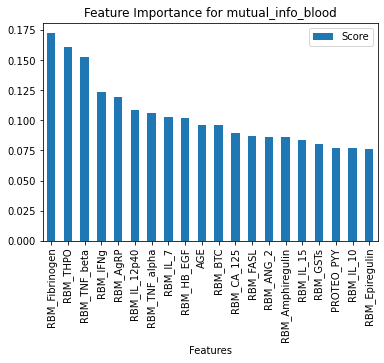

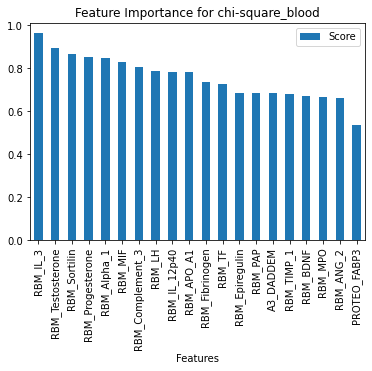

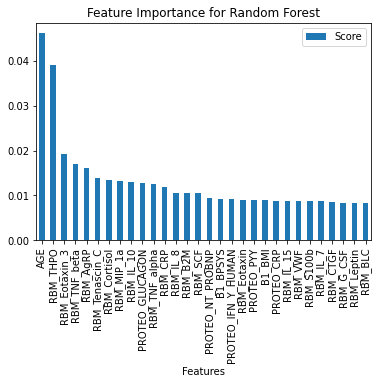

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	0
Tentative: 	27
Rejected: 	142
Iteration: 	9 / 10
Confirmed: 	9
Tentative: 	18
Rejected: 	142


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	9
Tentative: 	6
Rejected: 	142

------Support and Ranking for each feature------
AGE  - Ranking:  1
PROTEO_CRP  - Ranking:  1
RBM_Eotaxin_3  - Ranking:  1
RBM_IL_10  - Ranking:  1
RBM_PP  - Ranking:  1
RBM_Tenascin_C  - Ranking:  1
RBM_THPO  - Ranking:  1
RBM_TNF_alpha  - Ranking:  1
RBM_TNF_beta  - Ranking:  1
-----------------------------------------------------------------

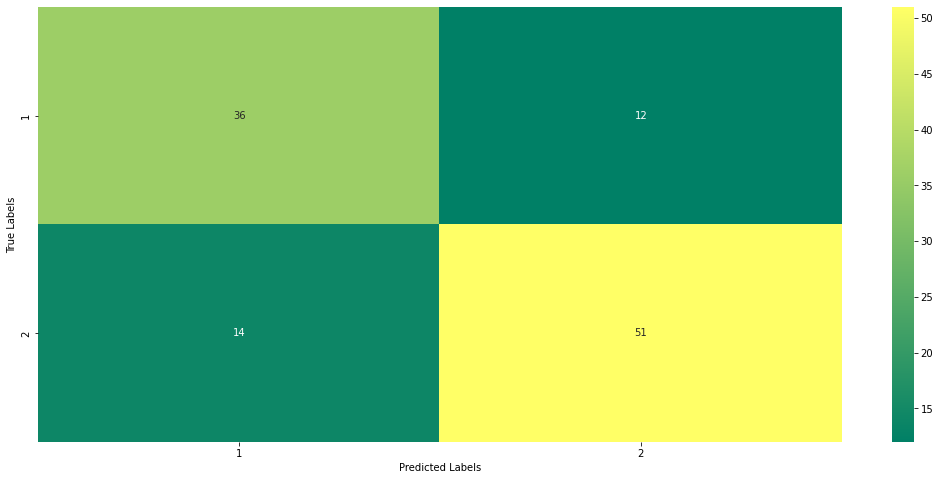

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


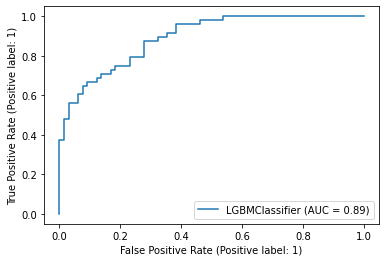


------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Random Forest: 
Accuracy Score: 80.53%
Binary-Averaged Precision score: 0.7321
Binary-Averaged Recall score: 0.8542
Binary-Averaged F1 score: 0.7885
Binary-Averaged F-Beta score: 0.8266
ROC_AUC Score: 0.8117
AUPRC is: 0.8241
Classification Report: 
              precision    recall  f1-score   support

           1       0.73      0.85      0.79        48
           2       0.88      0.77      0.82        65

    accuracy                           0.81       113
   macro avg       0.80      0.81      0.80       113
weighted avg       0.82      0.81      0.81       113



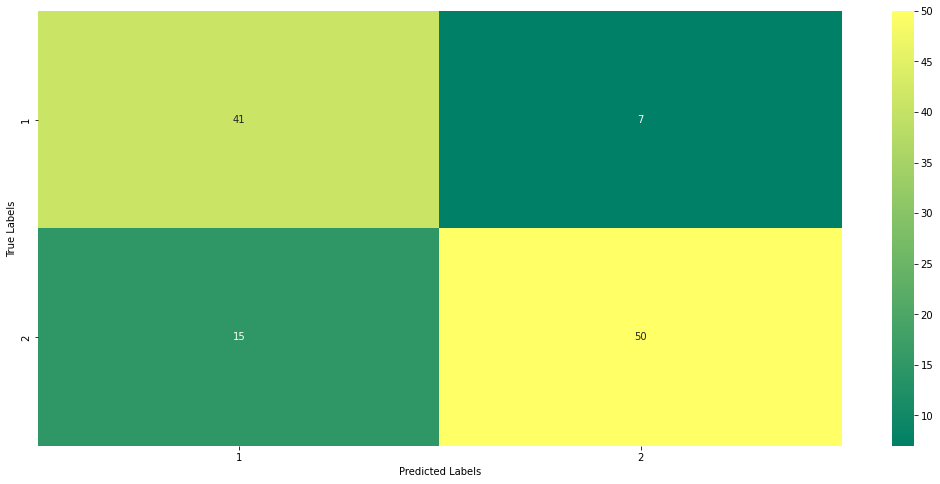

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


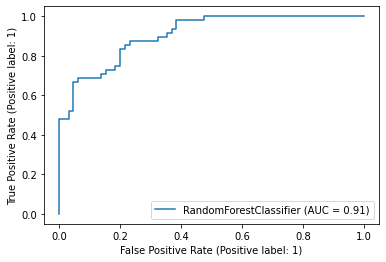


------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for eXtreme Gradient Boosting: 
Accuracy Score: 77.88000000000001%
Binary-Averaged Precision score: 0.7170
Binary-Averaged Recall score: 0.7917
Binary-Averaged F1 score: 0.7525
Binary-Averaged F-Beta score: 0.7755
ROC_AUC Score: 0.7804
AUPRC is: 0.7986
Classification Report: 
              precision    recall  f1-score   support

           1       0.72      0.79      0.75        48
           2       0.83      0.77      0.80        65

    accuracy                           0.78       113
   macro avg       0.78      0.78      0.78       113
weighted avg       0.78      0.78      0.78       113



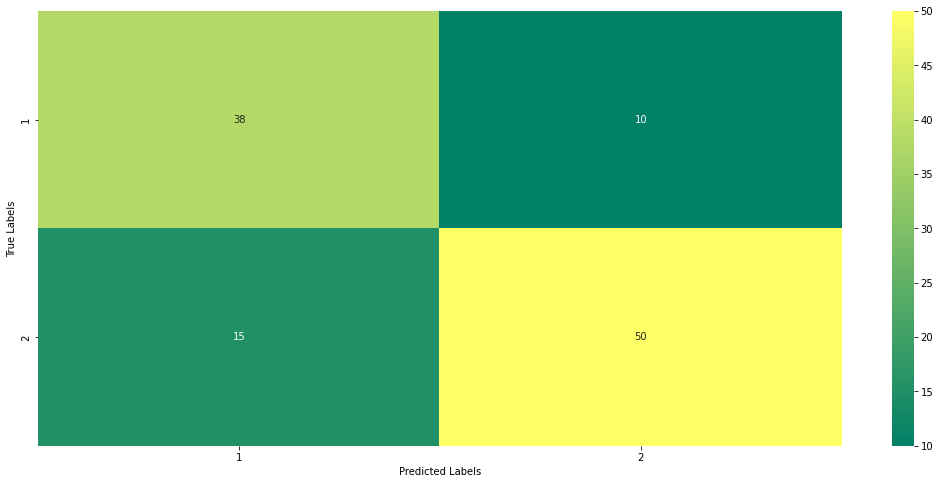

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


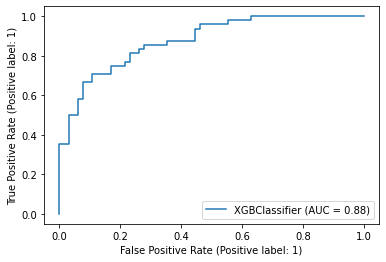


------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Gradient Boosting: 
Accuracy Score: 78.75999999999999%
Binary-Averaged Precision score: 0.7222
Binary-Averaged Recall score: 0.8125
Binary-Averaged F1 score: 0.7647
Binary-Averaged F-Beta score: 0.7927
ROC_AUC Score: 0.7909
AUPRC is: 0.8072
Classification Report: 
              precision    recall  f1-score   support

           1       0.72      0.81      0.76        48
           2       0.85      0.77      0.81        65

    accuracy                           0.79       113
   macro avg       0.78      0.79      0.79       113
weighted avg       0.79      0.79      0.79       113



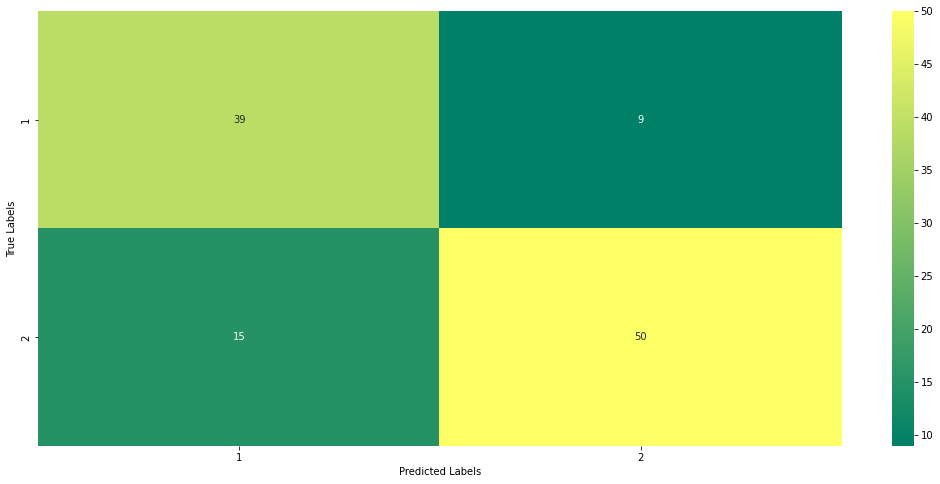

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


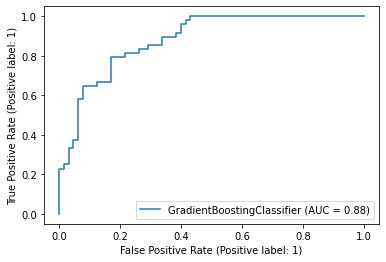


------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Decision Tree: 
Accuracy Score: 70.8%
Binary-Averaged Precision score: 0.6271
Binary-Averaged Recall score: 0.7708
Binary-Averaged F1 score: 0.6916
Binary-Averaged F-Beta score: 0.7371
ROC_AUC Score: 0.7162
AUPRC is: 0.7476
Classification Report: 
              precision    recall  f1-score   support

           1       0.63      0.77      0.69        48
           2       0.80      0.66      0.72        65

    accuracy                           0.71       113
   macro avg       0.71      0.72      0.71       113
weighted avg       0.72      0.71      0.71       113



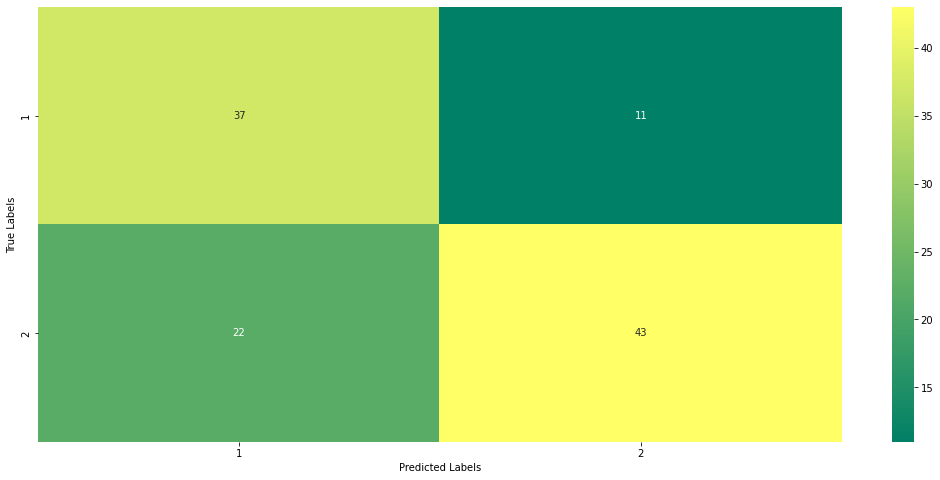

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


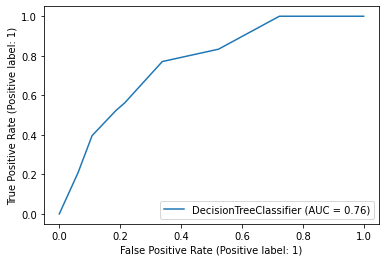


------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Logistic Regression: 
Accuracy Score: 73.45%
Binary-Averaged Precision score: 0.6875
Binary-Averaged Recall score: 0.6875
Binary-Averaged F1 score: 0.6875
Binary-Averaged F-Beta score: 0.6875
ROC_AUC Score: 0.7284
AUPRC is: 0.7539
Classification Report: 
              precision    recall  f1-score   support

           1       0.69      0.69      0.69        48
           2       0.77      0.77      0.77        65

    accuracy                           0.73       113
   macro avg       0.73      0.73      0.73       113
weighted avg       0.73      0.73      0.73       113



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


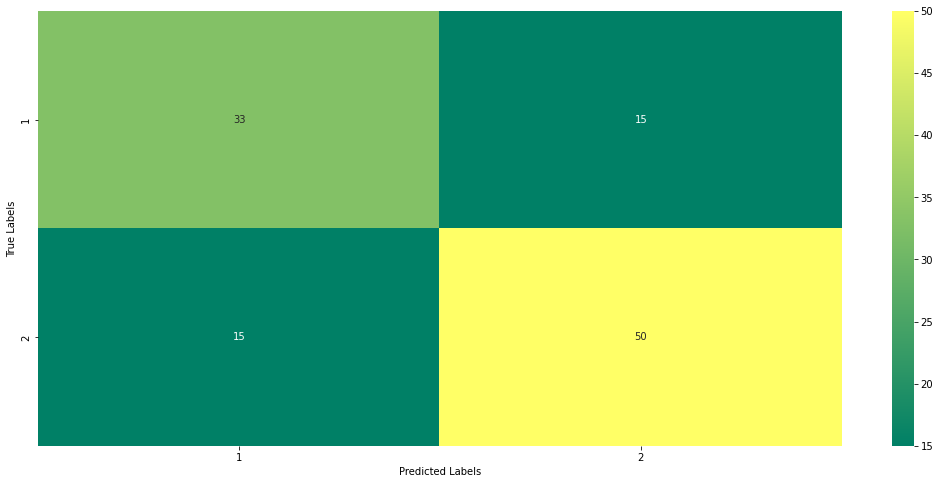

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


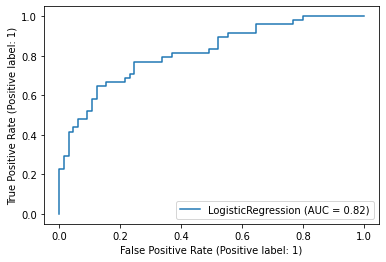


------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation for Extra Trees: 
Accuracy Score: 71.67999999999999%
Binary-Averaged Precision score: 0.6081
Binary-Averaged Recall score: 0.9375
Binary-Averaged F1 score: 0.7377
Binary-Averaged F-Beta score: 0.8459
ROC_AUC Score: 0.7457
AUPRC is: 0.7861
Classification Report: 
              precision    recall  f1-score   support

           1       0.61      0.94      0.74        48
           2       0.92      0.55      0.69        65

    accuracy                           0.72       113
   macro avg       0.77      0.75      0.72       113
weighted avg       0.79      0.72      0.71       113



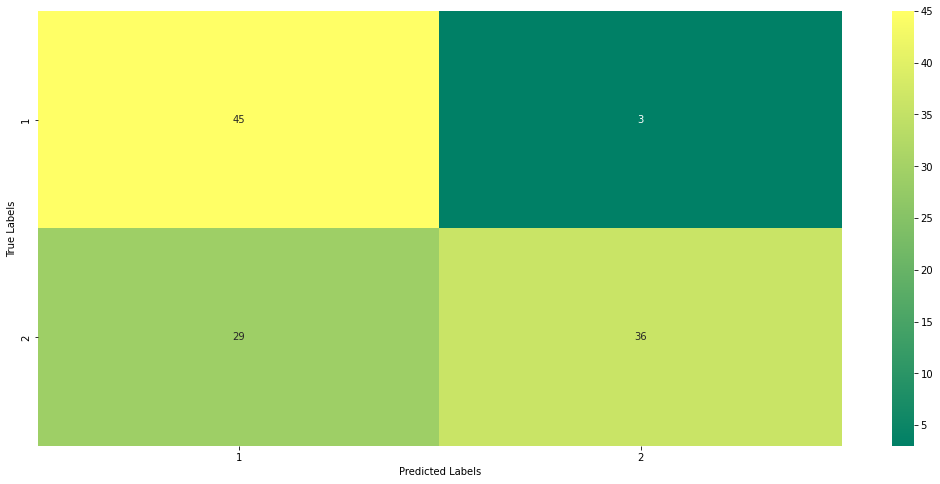

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


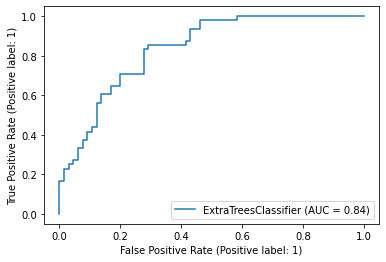


Learning rate set to 0.007326
0:	learn: 0.6898836	total: 52.6ms	remaining: 52.6s
1:	learn: 0.6860292	total: 57.1ms	remaining: 28.5s
2:	learn: 0.6824747	total: 63.9ms	remaining: 21.2s
3:	learn: 0.6778033	total: 69.3ms	remaining: 17.3s
4:	learn: 0.6742329	total: 73.8ms	remaining: 14.7s
5:	learn: 0.6709045	total: 78.2ms	remaining: 12.9s
6:	learn: 0.6673810	total: 82.4ms	remaining: 11.7s
7:	learn: 0.6639471	total: 86.8ms	remaining: 10.8s
8:	learn: 0.6620155	total: 91.1ms	remaining: 10s
9:	learn: 0.6585488	total: 95.5ms	remaining: 9.45s
10:	learn: 0.6557326	total: 99.8ms	remaining: 8.97s
11:	learn: 0.6526256	total: 104ms	remaining: 8.57s
12:	learn: 0.6491942	total: 108ms	remaining: 8.24s
13:	learn: 0.6457705	total: 113ms	remaining: 7.94s
14:	learn: 0.6426331	total: 117ms	remaining: 7.7s
15:	learn: 0.6398964	total: 122ms	remaining: 7.47s
16:	learn: 0.6370463	total: 126ms	remaining: 7.31s
17:	learn: 0.6343910	total: 131ms	remaining: 7.14s
18:	learn: 0.6320472	total: 135ms	remaining: 6.99s
19

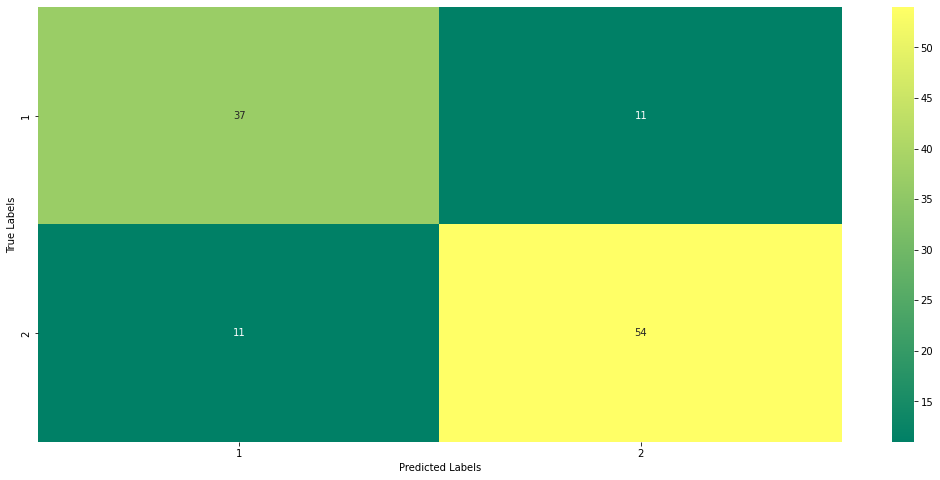

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


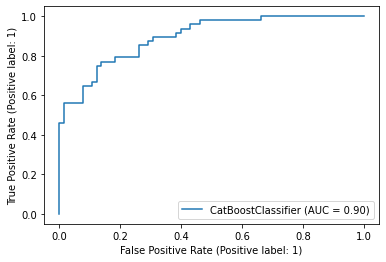

In [ ]:
model_main(df_biomarkers, df, dataset='blood')

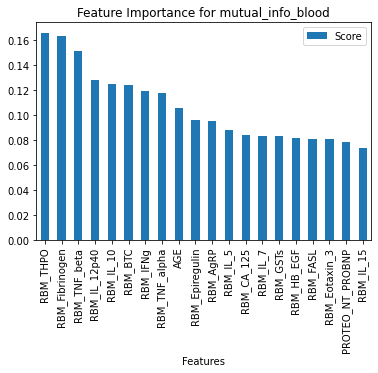

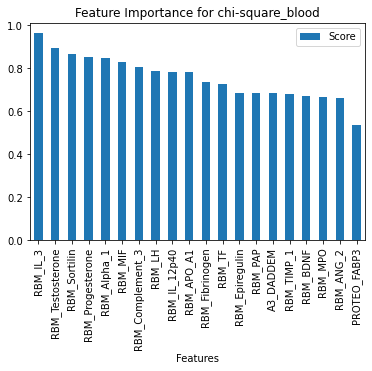

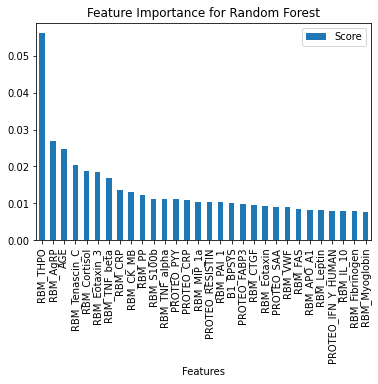

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	169
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	0
Tentative: 	28
Rejected: 	141
Iteration: 	9 / 10
Confirmed: 	8
Tentative: 	20
Rejected: 	141


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	8
Tentative: 	6
Rejected: 	141

------Support and Ranking for each feature------
AGE  - Ranking:  1
PROTEO_CRP  - Ranking:  1
RBM_Eotaxin_3  - Ranking:  1
RBM_IL_10  - Ranking:  1
RBM_Tenascin_C  - Ranking:  1
RBM_THPO  - Ranking:  1
RBM_TNF_alpha  - Ranking:  1
RBM_TNF_beta  - Ranking:  1


,RBM_THPO,RBM_IL_10,AGE,RBM_TNF_beta,RBM_Tenascin_C,RBM_TNF_alpha,RBM_Eotaxin_3,RBM_AgRP,RBM_S100b,RBM_Cortisol,...,RBM_MIP_1a,RBM_APO_A1,B1_BMI,PROTEO_PYY,RBM_Eotaxin,RBM_CRP,RBM_PP,RBM_IL_18,PROTEO_MPO,P1_PT_TYPE
1,2.5,2.8,84,1.35,2890.0,1.9,129.0,143.0,0.55,167.0,...,32.0,0.41,24.0,100.52,89.0,2.20,1150.0,245.0,134414.17,1
8,3.0,3.4,68,1.35,545.0,1.5,435.0,289.0,0.32,93.0,...,16.0,0.43,31.3,222.89,108.0,1.10,405.0,130.0,246925.76,1
16,2.3,2.4,76,1.35,799.0,1.8,54.0,112.0,0.27,73.0,...,32.0,0.55,21.6,85.94,74.0,1.70,1360.0,196.0,248456.01,1
27,6.6,7.7,86,1.15,997.0,6.1,133.0,67.0,0.70,13600.0,...,62.0,0.52,26.1,177.42,251.0,0.91,493.0,230.0,144716.40,1
31,12.0,3.5,82,1.15,1150.0,3.4,133.0,15.0,0.06,166.0,...,78.0,0.85,25.8,236.94,123.0,0.83,576.0,138.0,167387.91,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,5.1,7.6,68,3.00,498.0,9.4,51.5,101.0,0.41,103.0,...,117.0,0.41,29.6,178.68,233.0,2.80,276.0,327.0,141865.31,2
10277,5.9,3.3,57,1.15,871.0,5.0,173.0,46.0,0.33,93.0,...,57.0,0.44,33.5,97.78,163.0,6.40,71.0,199.0,92828.10,2
10285,6.2,6.6,68,5.00,467.0,1.7,124.0,46.0,0.70,98.0,...,121.0,0.21,23.6,93.77,165.0,0.57,34.0,231.0,79546.79,2
12002,4.2,16.0,65,5.30,1110.0,6.1,53.5,123.0,0.41,115.0,...,98.0,0.59,25.4,139.92,147.0,9.50,239.0,197.0,107532.91,2


In [ ]:
df_features_blood, df_features_diag, X_blood, y_blood, X_diag, y_diag = get_data(df_biomarkers, df)
    
# getting combined features after performing feature selection
mi_dfb, mi_plotb, chi_dfb, chi_plotb, rf_dfb, rf_plotb, rfr_dfb, dtr_dfb, b_dfb, combined_featuresb = results('blood', X_blood, y_blood, df_features_blood)

# convert features to list
combined_features_list_blood = combined_featuresb['Features'].to_list()
# getting only top features after feature selection
final_features_df_blood = df_features_blood[combined_features_list_blood]
# merge the dataset for machine learning model
frames_blood = [final_features_df_blood, y_blood]
final_df_blood = pd.concat(frames_blood, axis=1)

final_df_blood

In [ ]:
final_df_blood

,RBM_THPO,RBM_IL_10,AGE,RBM_TNF_beta,RBM_Tenascin_C,RBM_TNF_alpha,RBM_Eotaxin_3,RBM_AgRP,RBM_S100b,RBM_Cortisol,...,RBM_MIP_1a,RBM_APO_A1,B1_BMI,PROTEO_PYY,RBM_Eotaxin,RBM_CRP,RBM_PP,RBM_IL_18,PROTEO_MPO,P1_PT_TYPE
1,2.5,2.8,84,1.35,2890.0,1.9,129.0,143.0,0.55,167.0,...,32.0,0.41,24.0,100.52,89.0,2.20,1150.0,245.0,134414.17,1
8,3.0,3.4,68,1.35,545.0,1.5,435.0,289.0,0.32,93.0,...,16.0,0.43,31.3,222.89,108.0,1.10,405.0,130.0,246925.76,1
16,2.3,2.4,76,1.35,799.0,1.8,54.0,112.0,0.27,73.0,...,32.0,0.55,21.6,85.94,74.0,1.70,1360.0,196.0,248456.01,1
27,6.6,7.7,86,1.15,997.0,6.1,133.0,67.0,0.70,13600.0,...,62.0,0.52,26.1,177.42,251.0,0.91,493.0,230.0,144716.40,1
31,12.0,3.5,82,1.15,1150.0,3.4,133.0,15.0,0.06,166.0,...,78.0,0.85,25.8,236.94,123.0,0.83,576.0,138.0,167387.91,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,5.1,7.6,68,3.00,498.0,9.4,51.5,101.0,0.41,103.0,...,117.0,0.41,29.6,178.68,233.0,2.80,276.0,327.0,141865.31,2
10277,5.9,3.3,57,1.15,871.0,5.0,173.0,46.0,0.33,93.0,...,57.0,0.44,33.5,97.78,163.0,6.40,71.0,199.0,92828.10,2
10285,6.2,6.6,68,5.00,467.0,1.7,124.0,46.0,0.70,98.0,...,121.0,0.21,23.6,93.77,165.0,0.57,34.0,231.0,79546.79,2
12002,4.2,16.0,65,5.30,1110.0,6.1,53.5,123.0,0.41,115.0,...,98.0,0.59,25.4,139.92,147.0,9.50,239.0,197.0,107532.91,2


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.7 MB/s 


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


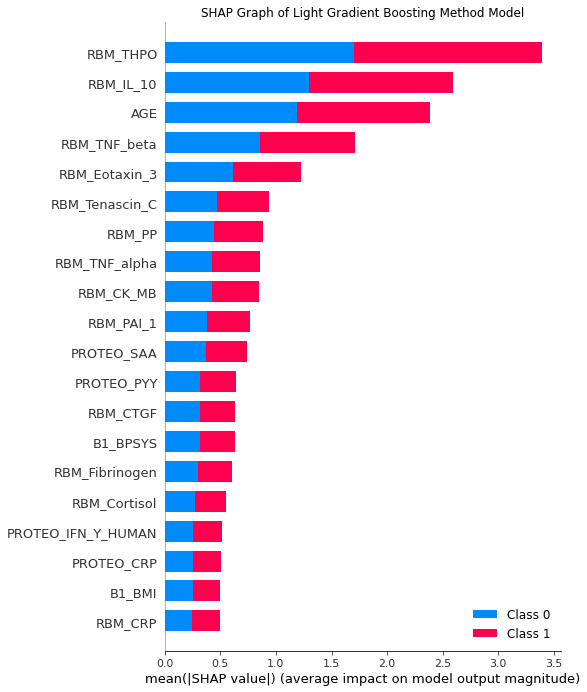

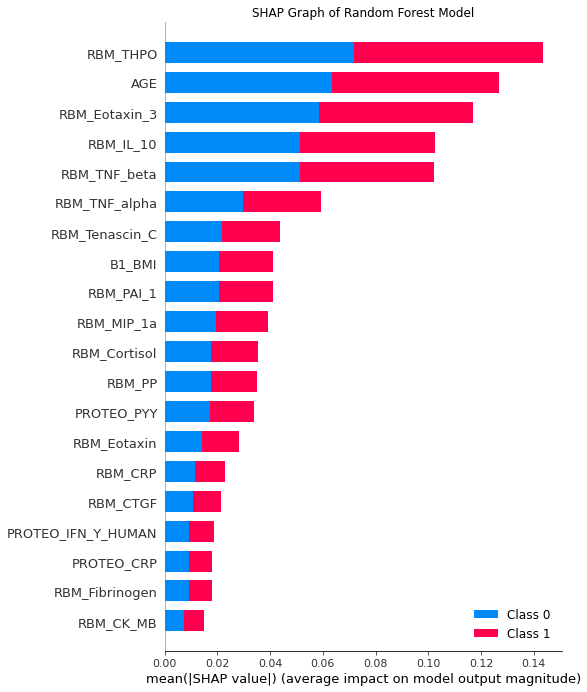

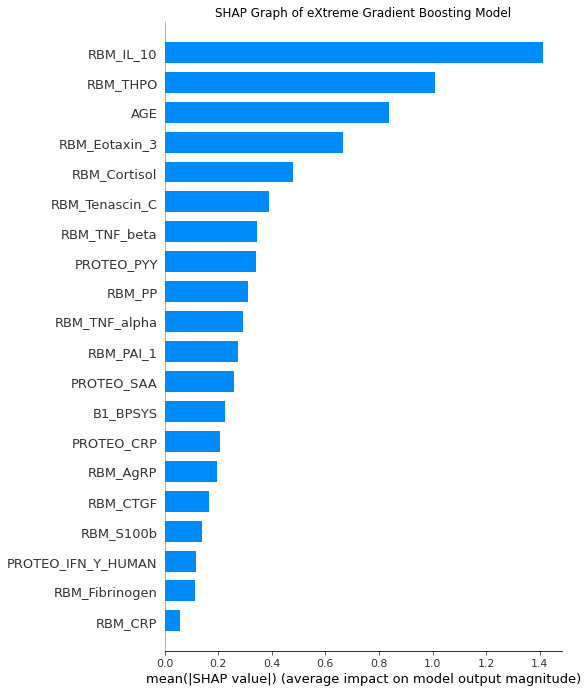

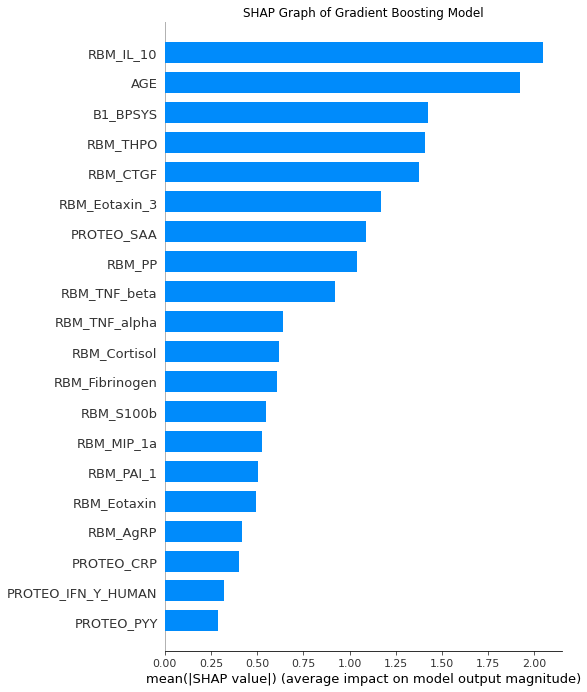

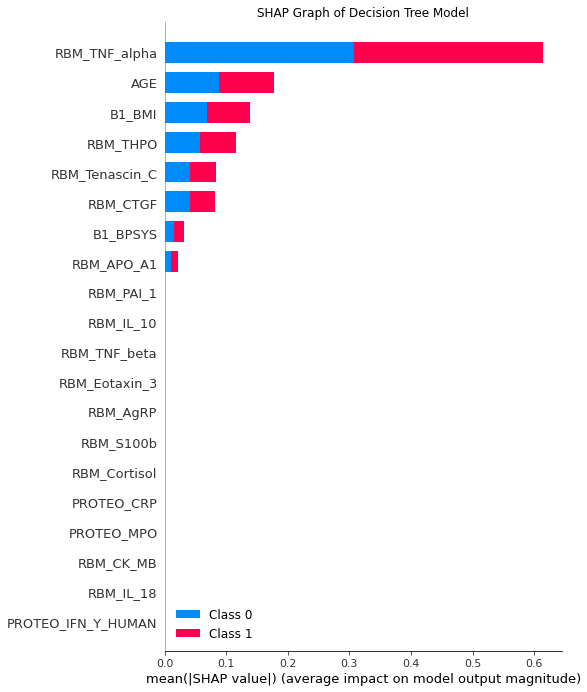

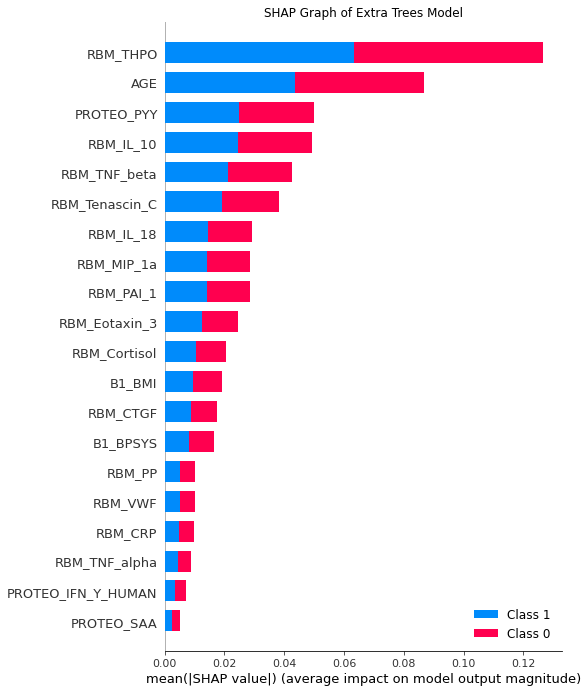

Learning rate set to 0.007326
0:	learn: 0.6896207	total: 5.36ms	remaining: 5.35s
1:	learn: 0.6858882	total: 11ms	remaining: 5.49s
2:	learn: 0.6822600	total: 17.2ms	remaining: 5.73s
3:	learn: 0.6795896	total: 22.5ms	remaining: 5.61s
4:	learn: 0.6767626	total: 28.3ms	remaining: 5.62s
5:	learn: 0.6734253	total: 33.5ms	remaining: 5.54s
6:	learn: 0.6695233	total: 38.5ms	remaining: 5.46s
7:	learn: 0.6667740	total: 43.5ms	remaining: 5.39s
8:	learn: 0.6633762	total: 49.8ms	remaining: 5.48s
9:	learn: 0.6597291	total: 54.8ms	remaining: 5.42s
10:	learn: 0.6563366	total: 60ms	remaining: 5.4s
11:	learn: 0.6537908	total: 65.5ms	remaining: 5.39s
12:	learn: 0.6506909	total: 70.7ms	remaining: 5.37s
13:	learn: 0.6476059	total: 75.7ms	remaining: 5.33s
14:	learn: 0.6439672	total: 80.8ms	remaining: 5.3s
15:	learn: 0.6404836	total: 85.9ms	remaining: 5.28s
16:	learn: 0.6382016	total: 90.9ms	remaining: 5.26s
17:	learn: 0.6348960	total: 96.3ms	remaining: 5.25s
18:	learn: 0.6318729	total: 102ms	remaining: 5.25s

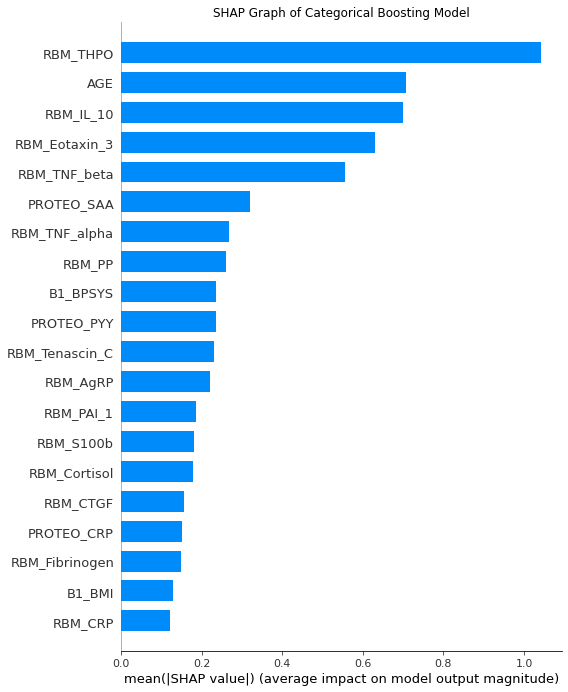

In [ ]:
import shap 

# perform train_test_split
X_train, X_test, y_train, y_test = ml_prep(final_df_blood)

# list of classifier functions
classifier_func = [lgbm.LGBMClassifier(colsample_bytree=0.46053366496668136,num_leaves= 122, random_state=42),
                  RandomForestClassifier(n_estimators=900, max_depth=8, random_state=42), 
                  XGBClassifier(colsample_bytree= 0.840545160958208, gamma= 0.3433699189306628, max_depth= 2),                    
                  GradientBoostingClassifier(n_estimators=300, max_depth=3), 
                  DecisionTreeClassifier(ccp_alpha=0.01, max_depth=6, max_features='log2', random_state=42),
                  #LogisticRegression(class_weight='balanced', max_iter=200, random_state=42, solver='sag'),
                  ExtraTreesClassifier(n_estimators=500, max_depth=3),
                  CatBoostClassifier(random_state=42)]  

# list of classifier names
model_name= ['Light Gradient Boosting Method',
            'Random Forest', 
            'eXtreme Gradient Boosting',
            'Gradient Boosting', 
            'Decision Tree', 
            #'Logistic Regression', 
            'Extra Trees',
            'Categorical Boosting']

# evaluate performance and feature importance for each algorithm
for model in range(len(classifier_func[:])):
    classifier_func[model].fit(X_train, y_train)
    #y_pred = classifier_func[model].predict(X_test)
    input_df = final_df_blood.drop(['P1_PT_TYPE'], axis=1, inplace = False)
    shap_values = shap.TreeExplainer(classifier_func[model]).shap_values(input_df)
    #print(model_name[model])
    #print(shap_values)
    shap.summary_plot(shap_values, input_df, plot_type='bar', show=False)
    title = "SHAP Graph of " + model_name[model] + " Model"
    plt.title(title)
    plt_title = model_name[model] + ".pdf"
    plt.savefig(plt_title, format="pdf", bbox_inches="tight")
    plt.show()

The max_iter was reached which means the coef_ did not converge


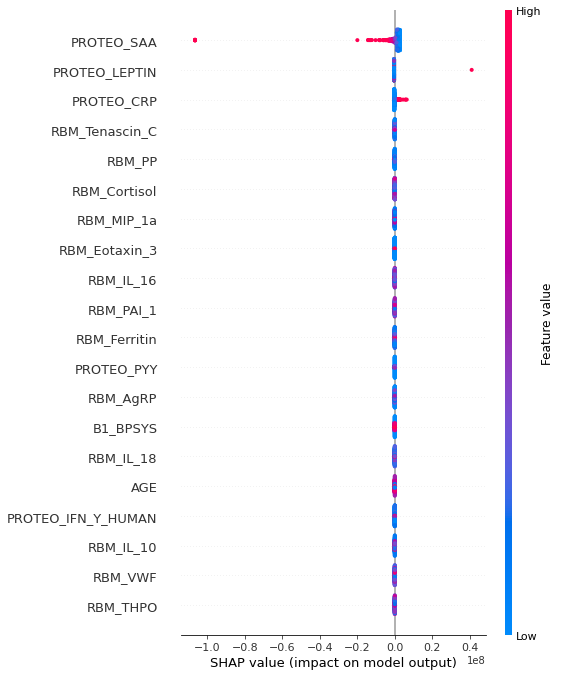

In [ ]:
lr_clf = LogisticRegression(class_weight='balanced', max_iter=200, random_state=42, solver='sag')
lr_clf.fit(X_train, y_train)
#y_pred = classifier_func[model].predict(X_test)
input_df = final_df_blood.drop(['P1_PT_TYPE'], axis=1, inplace = False)
shap_values = shap.Explainer(lr_clf, input_df, feature_names=input_df.columns).shap_values(input_df)
#print(shap_values)
shap.summary_plot(shap_values, input_df)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


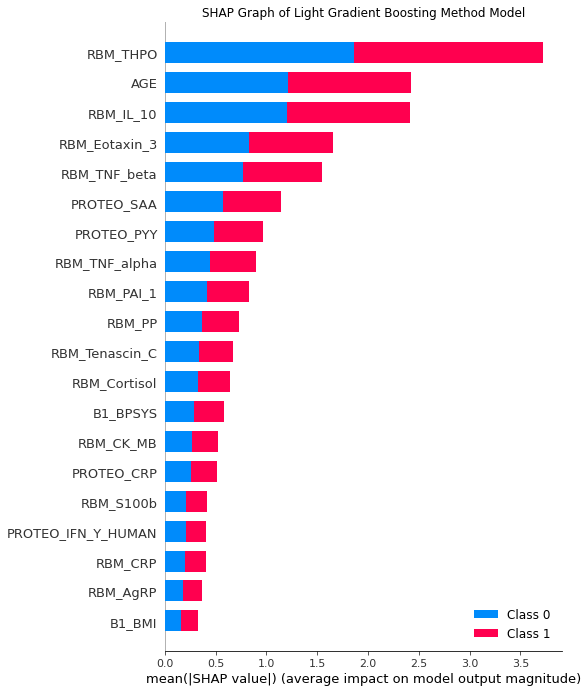

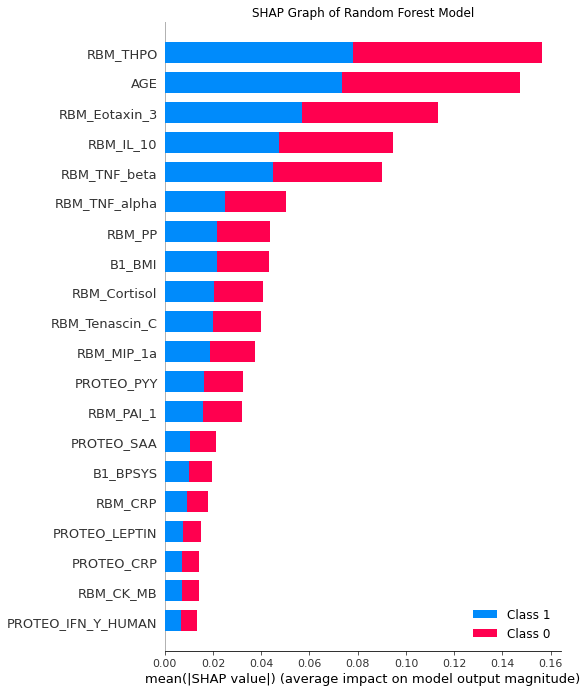

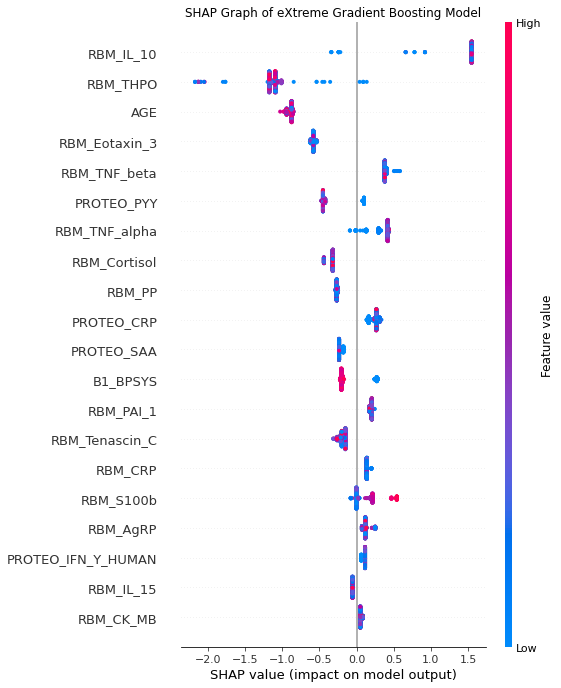

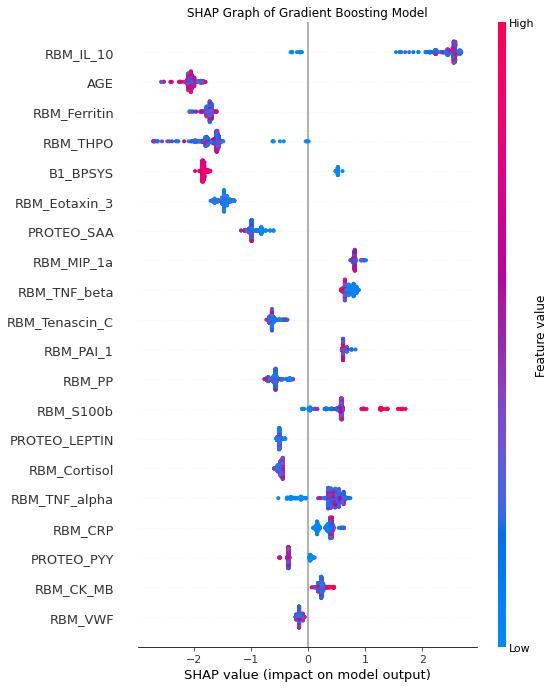

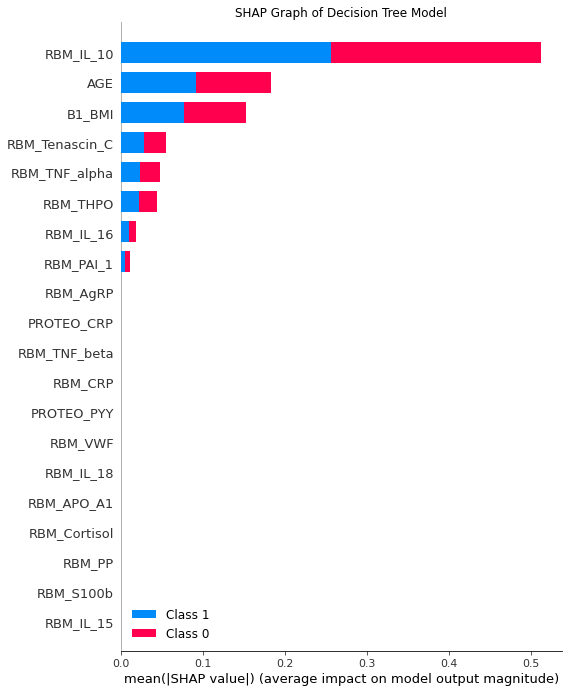

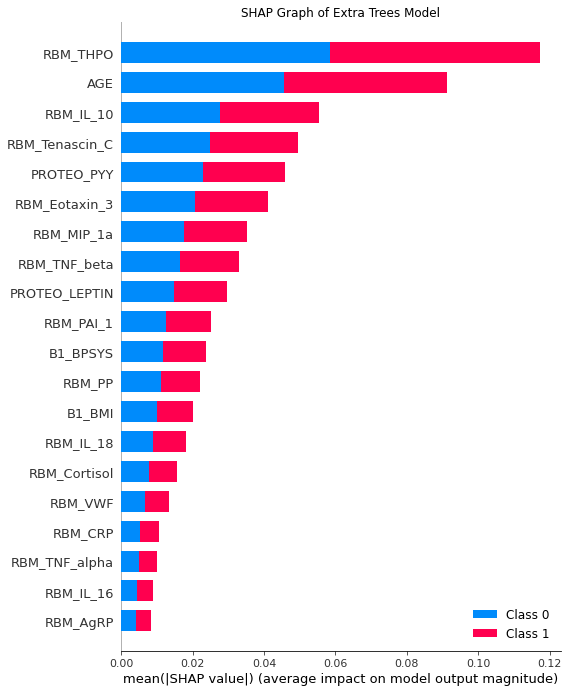

Learning rate set to 0.007326
0:	learn: 0.6897833	total: 6.87ms	remaining: 6.86s
1:	learn: 0.6866445	total: 11.9ms	remaining: 5.94s
2:	learn: 0.6835320	total: 16.6ms	remaining: 5.51s
3:	learn: 0.6788059	total: 21.3ms	remaining: 5.3s
4:	learn: 0.6745033	total: 26.4ms	remaining: 5.25s
5:	learn: 0.6711496	total: 31.4ms	remaining: 5.2s
6:	learn: 0.6677944	total: 36.3ms	remaining: 5.15s
7:	learn: 0.6647404	total: 41.3ms	remaining: 5.12s
8:	learn: 0.6621187	total: 46.3ms	remaining: 5.1s
9:	learn: 0.6588392	total: 51.6ms	remaining: 5.11s
10:	learn: 0.6564657	total: 56.6ms	remaining: 5.09s
11:	learn: 0.6534734	total: 61.6ms	remaining: 5.07s
12:	learn: 0.6504029	total: 66.7ms	remaining: 5.06s
13:	learn: 0.6467480	total: 71.6ms	remaining: 5.04s
14:	learn: 0.6431896	total: 76.7ms	remaining: 5.04s
15:	learn: 0.6399158	total: 81.7ms	remaining: 5.03s
16:	learn: 0.6363842	total: 87.1ms	remaining: 5.04s
17:	learn: 0.6335668	total: 92.3ms	remaining: 5.04s
18:	learn: 0.6311088	total: 97.4ms	remaining: 5

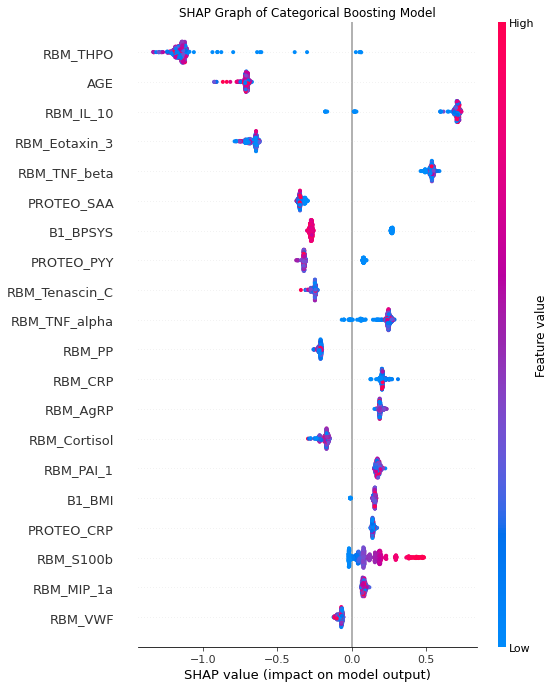

In [ ]:
# evaluate performance and feature importance for each algorithm
for model in range(len(classifier_func[:])):
    classifier_func[model].fit(X_train, y_train)
    #y_pred = classifier_func[model].predict(X_test)
    input_df = final_df_blood.drop(['P1_PT_TYPE'], axis=1, inplace = False)
    shap_values = shap.TreeExplainer(classifier_func[model]).shap_values(input_df)
    #print(model_name[model])
    #print(shap_values)
    shap.summary_plot(shap_values, input_df, show=False)
    title = "SHAP Graph of " + model_name[model] + " Model"
    plt.title(title)
    plt.show()